#### Defining the business problem:
The NHS’s primary concerns revolve around optimising its healthcare infrastructure and resources to account for increased population needs. There is a push on analysing utilisation trends across the health network in order to make informed decisions about budget allocation, capacity expansion or whether effort and resources should be maximised within the existing infrastructure. Stakeholder opinions vary in regard to budget allocation; thus it becomes necessary to explore the data available and recommendations based on what is found. This begins with a clearly defined business problem. In the case of the NHS, where there is a wealth of information and a plethora of questions presented, thus it would be wise to distil these presented concerns into four well-defined and comprehensive problem statements:

1. There is a lack of clarity on patient engagement in practices across England.
2. There is uncertainty about the proportion of patients actually attending their appointments. 
3. There is ambiguity surrounding appointment types, the type of professionals available, and service settings. 
4. There is no clear strategy for using external sources (X) to find popular hashtags, which may help improve public health communication and increase patient engagement.

From these problem statements, additional business questions have been derived, there as follows:

1) How many practices are there in England?
2) What is the number of attended appointments?
3) What is the number unattended appointments?
4) What is the number of appointments where patient's attendance was unknown?
5) What is the distribution of appointments across different actual duration intervals?
6) What is the count of attended appointments, and which appointment mode was utilised for these appointments?
7) What is the count of unattended appointments, and which appointment mode was utilised for these appointments?
8) How does the attendance of appointments vary across different healthcare professional types, and what is the distribution of attended appointments among these types?
9) What is the distribution of attended appointments across various healthcare professionals and appointment modes?


#### 1) Summary of planned approach:


1) It is crucial to uncover the number and locations of practices in England, focusing on those with the highest appointment volumes. This analysis will reveal patterns in patient engagement and the geographical distribution of GP locations across England. Additionally, understanding staff capacity and the types of professionals present is essential.

2) We aim to explore the types of professionals attending, monthly appointment counts, and details about the setting, context, and mode of these appointments.

3) Analysing public engagement with healthcare-related hashtags can gauge the effectiveness of NHS public health communications. Public responses, being subjective and unfiltered, provide a comprehensive expression of individuals' perspectives. This approach, unlike conventional data retrieval techniques that may introduce bias, allows for a more holistic understanding.








### 2) Prepare your workstation

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import and sense-check 'actual_duration.csv' as ad.
ad = pd.read_csv('actual_duration.csv')

In [3]:
# View the DataFrame.
print(ad.shape)
print(ad.columns)
print(ad.dtypes)
ad.head()

(137793, 8)
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [4]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], format='%d-%b-%y')

#### Interpretation:

- Looking at the shape of the data, generates the count of the number of rows and columns in a data set. Here we can see the there are 137793 rows and 8 columns. 
- We can see the the datatypes contained in each column of the Dataframe using .dtypes
- .columns has been used here to return the column lables in the DataFrame 
- .head() function has been used to view the first  5 rows of the dataframe

#### NOTE: The same methods are applied to the following DataFrames to sense check the data.

In [5]:
# Check for missing values using the isnull() method.
print(ad.isnull())
ad.isnull().sum().sum()

        sub_icb_location_code  sub_icb_location_ons_code  \
0                       False                      False   
1                       False                      False   
2                       False                      False   
3                       False                      False   
4                       False                      False   
...                       ...                        ...   
137788                  False                      False   
137789                  False                      False   
137790                  False                      False   
137791                  False                      False   
137792                  False                      False   

        sub_icb_location_name  icb_ons_code  region_ons_code  \
0                       False         False            False   
1                       False         False            False   
2                       False         False            False   
3                      

0

#### Interpretation:

There are no missing values in the ad (actual_duration) DataFrame.

In [6]:
# Review metadata and descriptive statistics.
print(ad.info())
ad.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   sub_icb_location_code      137793 non-null  object        
 1   sub_icb_location_ons_code  137793 non-null  object        
 2   sub_icb_location_name      137793 non-null  object        
 3   icb_ons_code               137793 non-null  object        
 4   region_ons_code            137793 non-null  object        
 5   appointment_date           137793 non-null  datetime64[ns]
 6   actual_duration            137793 non-null  object        
 7   count_of_appointments      137793 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 8.4+ MB
None


,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


#### Interpretation:

- the .info () method information about the Dataframe (i.e. number of cells in each colum, range index, memory usage, column data types, column labels and the number of colums. It is used to get a succinct summary of the dataframe. 
- the .describe () method is used to return descriptive statistics as shown in the output. As count_of_appointments contains the integer data type, the descriptive statistics are returned on the values in this column. For instance, matching with the number of rows we can see that the count is 1137793. 

In [7]:
# Import and sense-check 'appointments_regional.csv' as ar.
ar = pd.read_csv('appointments_regional.csv')

In [8]:
# View the DataFrame.
print(ar.shape)
print(ar.columns)
print(ar.dtypes)
ar.head()

(596821, 7)
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [9]:
# Change the date format of ar['appointment_date'].
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'], format='%Y-%m')

In [10]:
# Check for missing values.
print(ar.isnull())
ar.isnull().sum().sum()

        icb_ons_code  appointment_month  appointment_status  hcp_type  \
0              False              False               False     False   
1              False              False               False     False   
2              False              False               False     False   
3              False              False               False     False   
4              False              False               False     False   
...              ...                ...                 ...       ...   
596816         False              False               False     False   
596817         False              False               False     False   
596818         False              False               False     False   
596819         False              False               False     False   
596820         False              False               False     False   

        appointment_mode  time_between_book_and_appointment  \
0                  False                              False 

0

#### Interpretation:

- There are no missing values in this DataFrame.

In [11]:
# Review metadata and descriptive statistics.
print(ar.info())
ar.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   icb_ons_code                       596821 non-null  object        
 1   appointment_month                  596821 non-null  datetime64[ns]
 2   appointment_status                 596821 non-null  object        
 3   hcp_type                           596821 non-null  object        
 4   appointment_mode                   596821 non-null  object        
 5   time_between_book_and_appointment  596821 non-null  object        
 6   count_of_appointments              596821 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 31.9+ MB
None


,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


#### Interpretation:

- As count_of_appointments contains the integer data type, the descriptive statistics are returned on the values in this column. For instance, matching with the number of rows we can see that the count is 596821 in the ar DataFrame.

In [12]:
# Import and sense-check 'national_categories.xlsx' as nc.
nc = pd.read_excel('national_categories.xlsx')

In [13]:
# View the DataFrame.
print(nc.shape)
print(nc.columns)
print(nc.dtypes)
nc.head()

(817394, 8)
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [14]:
# Change the date format of nc['appointment_date'].
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'], format='%Y-%m-%d')

In [15]:
# Check for missing values.
print(nc.isnull())
nc.isnull().sum().sum()

        appointment_date  icb_ons_code  sub_icb_location_name  \
0                  False         False                  False   
1                  False         False                  False   
2                  False         False                  False   
3                  False         False                  False   
4                  False         False                  False   
...                  ...           ...                    ...   
817389             False         False                  False   
817390             False         False                  False   
817391             False         False                  False   
817392             False         False                  False   
817393             False         False                  False   

        service_setting  context_type  national_category  \
0                 False         False              False   
1                 False         False              False   
2                 False         False  

0

#### Interpretation:

- There are no missing values in the nc DataFrame.

In [16]:
# Review metadata and descriptive statistics.
print(nc.info())
nc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB
None


,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


#### Interpretation:

As count_of_appointments contains the integer data type, the descriptive statistics are returned on the values in this column. For instance, matching with the number of rows we can see that the count is 817394 in the nc DataFrame.

### Exploration:

**Question 1:** How many locations are there in the data set?

In [17]:
# Determine the number of locations.
number_of_locations = nc['sub_icb_location_name'].value_counts().reset_index()

# Rename the columns in the DataFrame
number_of_locations.columns = ['sub_icb_location_name', 'number_of_locations']

# View the output
number_of_locations

,sub_icb_location_name,number_of_locations
0,NHS North West London ICB - W2U3Z,13007
1,NHS Kent and Medway ICB - 91Q,12637
2,NHS Devon ICB - 15N,12526
3,NHS Hampshire and Isle Of Wight ICB - D9Y0V,12171
4,NHS North East London ICB - A3A8R,11837
...,...,...
101,NHS North East and North Cumbria ICB - 00N,4210
102,NHS Lancashire and South Cumbria ICB - 02G,4169
103,NHS Cheshire and Merseyside ICB - 01V,3496
104,NHS Cheshire and Merseyside ICB - 01T,3242


#### Interpretation:

This output shows that there are 106 practices across England. In this context the 'number_of_locations' represent the count of occurences for each unique value in the 'sub_icb_location_name' column. The 'sub_icb_location_name' column contains data about the different practice locations, so by using value_counts () on this column we are essentially counting the number of times ach location appears in the dataframe. Thus, the values in 'number_of_locations' column not to be confused as the number of appointments made at each location.

**Question 2:** What are the five locations with the highest number of appointments?



In [18]:
# Assuming 'count_of_appointments' column is present in your dataframe
top_five_locations = nc['sub_icb_location_name'].value_counts().nlargest(5).reset_index(name='count_of_appointments')

# Assigning new column names to the DataFrame 
top_five_locations.columns = ['sub_icb_location_name', 'count_of_appointments']

# Display the top five locations
top_five_locations

,sub_icb_location_name,count_of_appointments
0,NHS North West London ICB - W2U3Z,13007
1,NHS Kent and Medway ICB - 91Q,12637
2,NHS Devon ICB - 15N,12526
3,NHS Hampshire and Isle Of Wight ICB - D9Y0V,12171
4,NHS North East London ICB - A3A8R,11837


#### Interpretation:

The top five locations with the highest number of appointments is the NHS North West London ICB - W2U3Z, NHS Kent and Medway ICB - 91Q, NHS Devon ICS. 15N, NHS Hampshire and Isle of Wight ICB - D9Y0V, NHS North East London ICB - A3A8R.

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [19]:
# Determine the number of service settings.
number_of_service_settings = nc['service_setting'].value_counts().reset_index()

# Assigning new column names to the DataFrame 
number_of_service_settings.columns = ['service_setting', 'number_of_service_settings']

# View the output
number_of_service_settings

,service_setting,number_of_service_settings
0,General Practice,359274
1,Primary Care Network,183790
2,Other,138789
3,Extended Access Provision,108122
4,Unmapped,27419


#### Interpretation:

There are five service settings, that is, General Practice, Primary Care Network, Other, Extended Access Provision and Unmapped. The 'Number_of_service_settings' column merely shows the count of occurences of each service setting. 

In [20]:
# Determine the number of context types.
number_of_context_types = nc['context_type'].value_counts().reset_index()

# Assigning new column names to the DataFrame 
number_of_context_types.columns = ['context_type', 'Number_of_context_types']

# View the ouput
number_of_context_types

,context_type,Number_of_context_types
0,Care Related Encounter,700481
1,Inconsistent Mapping,89494
2,Unmapped,27419


#### Interpretation:

There are three service settings, that is, Care Related Encounter, Inconsistent Mapping and Unmapped. The 'Number_of_contex_types' column merely shows the count of occurences of each Context type.

In [21]:
# Determine the number of national categories.
number_of_national_categories = nc['national_category'].value_counts().reset_index()

# Assigning new column names to the DataFrame 
number_of_national_categories.columns = ['national_category', 'Number_of_national_categories']

# View the ouput
number_of_national_categories 

,national_category,Number_of_national_categories
0,Inconsistent Mapping,89494
1,General Consultation Routine,89329
2,General Consultation Acute,84874
3,Planned Clinics,76429
4,Clinical Triage,74539
5,Planned Clinical Procedure,59631
6,Structured Medication Review,44467
7,Service provided by organisation external to t...,43095
8,Home Visit,41850
9,Unplanned Clinical Activity,40415


#### Interpretation:

There are 18 National categories. The 'Number_of_national_categories' column merely shows the count of occurences of each National category. 

In [22]:
# Determine the number of appointment statuses.
number_of_appointment_statuses = ar['appointment_status'].value_counts().reset_index()

# Assigning new column names to the DataFrame 
number_of_appointment_statuses.columns = ['appointment_status', 'Number_of_appointment_statuses']

# View the ouput
number_of_appointment_statuses

,appointment_status,Number_of_appointment_statuses
0,Attended,232137
1,Unknown,201324
2,DNA,163360


#### Interpretation:

There are 3 appointment statuses. The 'Number_of_appointment_statuses' column merely shows the count of occurences of each appointment status. 

## Additional questions

##### 1) What is the number of attended appointments?

In [23]:
# Determine the number of attended appointments
attended_appointments = ar['appointment_status'].value_counts()['Attended']

# Using a print statement with a docstring
print(f"The number of attended appointments is: {attended_appointments}")

The number of attended appointments is: 232137


#### Approach:

- The .value_counts ( ) method on the ‘appointment_status’ column of the ar DataFrame  generated a count of each appointment status and the count of ‘Attended’ appointment specifically.
- A print statement with an f-string was used to present a clear and concise output in the form a docstring.

##### 2) What is the number unattended appointments?

In [24]:
# Determine the number of unattended appointments
unattended_appointments = ar['appointment_status'].value_counts()['DNA']

# View the ouput
print(f"The number of unattended appointments is: {unattended_appointments}")

The number of unattended appointments is: 163360


#### Approach:

- The .value_counts ( ) method on the ‘appointment_status’ column of the ar DataFrame  generated a count of each appointment status and the count of ‘DNA’ appointment specifically.
- A print statement with an f-string was used to present a clear and concise output in the form a docstring.

##### 3) What is the number of appointments where patient's attendance was unknown?

In [25]:
# Determine the number of appointments where patient attendence is unknown 
unknown_appointments = ar['appointment_status'].value_counts()['Unknown']

# View the ouput
print(f"The number of appointments where patient attendance is unknown: {unknown_appointments}")

The number of appointments where patient attendance is unknown: 201324


#### Approach:

- The .value_counts ( ) method on the ‘appointment_status’ column of the ar DataFrame  generated a count of each appointment status and the count of ‘Unknown’ appointment specifically.
- A print statement with an f-string was used to present a clear and concise output in the form a docstring.

#### Interpretation:

The majority of patients attended their appointments, with the second-largest group being instances where attendance was unknown, followed by the least frequent category of unattended appointments. Even though, patients mostly attended their appointments instances where appointment attendance was unknown or unattended was considerably high. According to NHS England (2019) each year over 15 million general practice appointments are missed due to patients’ failure to show without notifying the surgeries. Out of 307 million schedules appointments with healthcare professions, e.g. therapists, other practice staff and GP’s, 5% are missed and this results in approximately 15.4 million vacant sots. With each appointment averaging a cost of £30 the total expense for the NHS exceeds £216 million, and this is without considering the disruption to other patients and staff. While unattended and unknown appointments appear lower than attended, these figures would still impact the NHS’ total expenses. Furthermore, the ‘unknown’ data poses a significant challenge for meaningful interpretations, as it is not known whether these appointments were attended or not.

##### 4) What is the distribution of appointments across different actual duration intervals?

In [26]:
# Group by 'actual_duration' and count the number of appointments
count_per_duration = ad.groupby('actual_duration')['count_of_appointments'].count().reset_index()

# Rename the count column
count_per_duration = count_per_duration.rename(columns={'count_of_appointments': 'count_of_appointments'})

# Order by 'actual_duration' from largest to smallest
count_per_duration = count_per_duration.sort_values(by='actual_duration', ascending=False).reset_index(drop=True)

# Print the result
count_per_duration

,actual_duration,count_of_appointments
0,Unknown / Data Quality,20161
1,6-10 Minutes,19902
2,31-60 Minutes,19097
3,21-30 Minutes,19452
4,16-20 Minutes,19534
5,11-15 Minutes,19738
6,1-5 Minutes,19909


#### Approach:

- A new DataFrame named  ‘count_per_duration’, was created.
- The .groupby( ) method on the ‘actual_duration’ column of the ‘ad’ DataFrame was used to group appointment by their actual duration.
- The .count( ) method was applied to determine the number of appointments within each duration group.
- The resulting DataFramed was ordered in descending order and index reset using ‘ascending=False’.


#### Interpretation:
The ouput shows the distribution of the count of appointments across various actual duration intervals, which provides insight into the patterns of appointment length in the dataset. For instance, there are 20,161 appointments with an unknown or data quality issue regarding the actual duration, 19,902 appointments with an actual duration between 6 and 10 minutes and 19,909 appointments with an actual duration between 1 and 5 minutes.  


### 3) Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [27]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [28]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [29]:
# Determine the minimum and maximum dates in the ad DataFrame.
min_max_dates_ad = ad['appointment_date'].agg(['min', 'max'])

"""code snippet calculates the minimum and maximum dates in the 'appointment_date' 
column of a the ad DataFrame"""

# Print the result
print("Minimum and maximum dates in the ad DataFrame:")
print(min_max_dates_ad)

Minimum and maximum dates in the ad DataFrame:
min   2021-12-01
max   2022-06-30
Name: appointment_date, dtype: datetime64[ns]


#### Interpretation:

The minimum date in the ad DataFrame is the 1st of December 2021 and the maximum date is the 30th of june 2022.

In [30]:
# Determine the minimum and maximum dates in the nc DataFrame.
min_max_dates_nc = nc['appointment_date'].agg(['min', 'max'])

"""code snippet calculates the minimum and maximum dates in the 'appointment_date' 
column of a the nc DataFrame"""

# Print the result
print("Minimum and maximum dates in the nc DataFrame:")
print(min_max_dates_nc)

Minimum and maximum dates in the nc DataFrame:
min   2021-08-01
max   2022-06-30
Name: appointment_date, dtype: datetime64[ns]


#### Interpretation:

The minimum date in the nc DataFrame is the 1st of August 2021 and the maximum date is the 30th of June 2022.

**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [31]:
# Filter the data to find the sub icb location code of NHS North West London ICB - W2U3Z
filtered_service_setting = nc[nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z']

# View the first 5 rows
filtered_service_setting.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
794321,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,607,2021-08
794322,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,Other,Inconsistent Mapping,Inconsistent Mapping,6,2021-08
794323,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Inconsistent Mapping,Inconsistent Mapping,47,2021-08
794324,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,Walk-in,74,2021-08
794325,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,Planned Clinics,98,2021-08


#### Interpretation:

Here I have filtered the nc DataFrame to get the icb code that represents NHS North West London ICB - W2U3Z which is E54000027.

In [32]:
# Filter the appointment date using the filtered_service_setting DataFrame
filtered_service_setting = nc[(nc['appointment_date'] >= '2022-01-01') & \
                               (nc['appointment_date'] <= '2022-06-01')] \

# Count of each unique value in the 'service_setting' column of the filtered DataFrame
nc_subset = filtered_service_setting['service_setting'].value_counts().reset_index()

# Assigning new column names to the DataFrame 
nc_subset.columns = ['service_setting', 'Count']

# Find the row with the maximum count
max_count_service_setting = nc_subset.nlargest(1, 'Count')

# Print the result
print(f"The service setting with the most appointments in North West London from 1 January to 1 June 2022 is:")
max_count_service_setting

The service setting with the most appointments in North West London from 1 January to 1 June 2022 is:


,service_setting,Count
0,General Practice,164187


#### Interpretation:

The service setting that most popular for NHS North West London from 1 January to 1 June 2022 was 'General Practice'.

**Question 3:** Which month had the highest number of appointments?

In [33]:
# Group by appointment date and calculate the sum of appointments for each date
appointments_by_date = nc.groupby('appointment_date')['count_of_appointments'].sum()

# Group by year and month and get the sum of appointments for each month
appointments_by_month = nc.groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month])['count_of_appointments'].sum()

# Sort appointments by count_of_appointments in ascending order
appointments_sorted = nc.sort_values('count_of_appointments')

# Find the month with the highest number of appointments using idxmax()
highest_month = appointments_by_month.idxmax()

# View output
print(f"The month with the highest number of appointments is: {highest_month[1]}-{highest_month[0]} with {appointments_by_month.max()} appointments.")

The month with the highest number of appointments is: 11-2021 with 30405070 appointments.


#### Approach

- highest_month[1]: Extracts the month component from the highest_month variable, which represents the index (year, month) of the maximum value in the appointments_by_month Series.
- highest_month[0]: Extracts the year component from the highest_month variable.
- appointments_by_month.max(): Represents the maximum number of appointments for the month in the appointments_by_month Series.
- {highest_month[1]}: This part extracts the month component from the highest_month variable. The variable highest_month represents the index (year, month) of the maximum value in the appointments_by_month Series. The index is a tuple, and [1] accesses the second element of the tuple, which is the month.


**Question 4:** What was the total number of records per month?

In [34]:
# Group by the appointment month, summing the appointments for each month
monthly_appointments_nc = nc.groupby(nc['appointment_date'].dt.to_period('M'))['count_of_appointments'].sum().reset_index()

# Assigning new column names to the DataFrame 
monthly_appointments_nc.columns = ['appointment_month', 'sum_of_appointments']

# View the ouput
monthly_appointments_nc.head()

,appointment_month,sum_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776


In [35]:
# Group by the appointment month, summing the appointments for each month
monthly_appointments_ar = ar.groupby(ar['appointment_month'].dt.to_period('M'))['count_of_appointments'].sum().reset_index()

# Assigning new column names to the DataFrame 
monthly_appointments_ar.columns = ['appointment_month', 'sum_of_appointments']

# View the ouput
monthly_appointments_ar.head()

,appointment_month,sum_of_appointments
0,2020-01,27199296
1,2020-02,24104621
2,2020-03,24053468
3,2020-04,16007881
4,2020-05,16417212


In [36]:
# Group by the appointment month, summing the appointments for each month
monthly_appointments_ad = ad.groupby(ar['appointment_month'].dt.to_period('M'))['count_of_appointments'].sum().reset_index()

# Assigning new column names to the DataFrame 
monthly_appointments_ad.columns = ['appointment_month', 'sum_of_appointments']
        
# View the ouput
monthly_appointments_ad.head()

,appointment_month,sum_of_appointments
0,2020-01,5072231
1,2020-02,5061669
2,2020-03,5262116
3,2020-04,4747021
4,2020-05,5045710


### 4) Visualisations


### Create visualisations and identify possible monthly and seasonal trends in the data.

In [37]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [38]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'] = nc['appointment_month'].astype("string")

# View the data types
nc.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                string
dtype: object

##### Context type

In [39]:
# Group by the appointment month and context type summing the appointments for each month 
nc_ct = nc.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index()

# Assigning new column names to the DataFrame 
nc_ct.columns = ['appointment_month', 'context_type', 'sum_of_appointments']

# View the first 5 rows
nc_ct.head()

,appointment_month,context_type,sum_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135


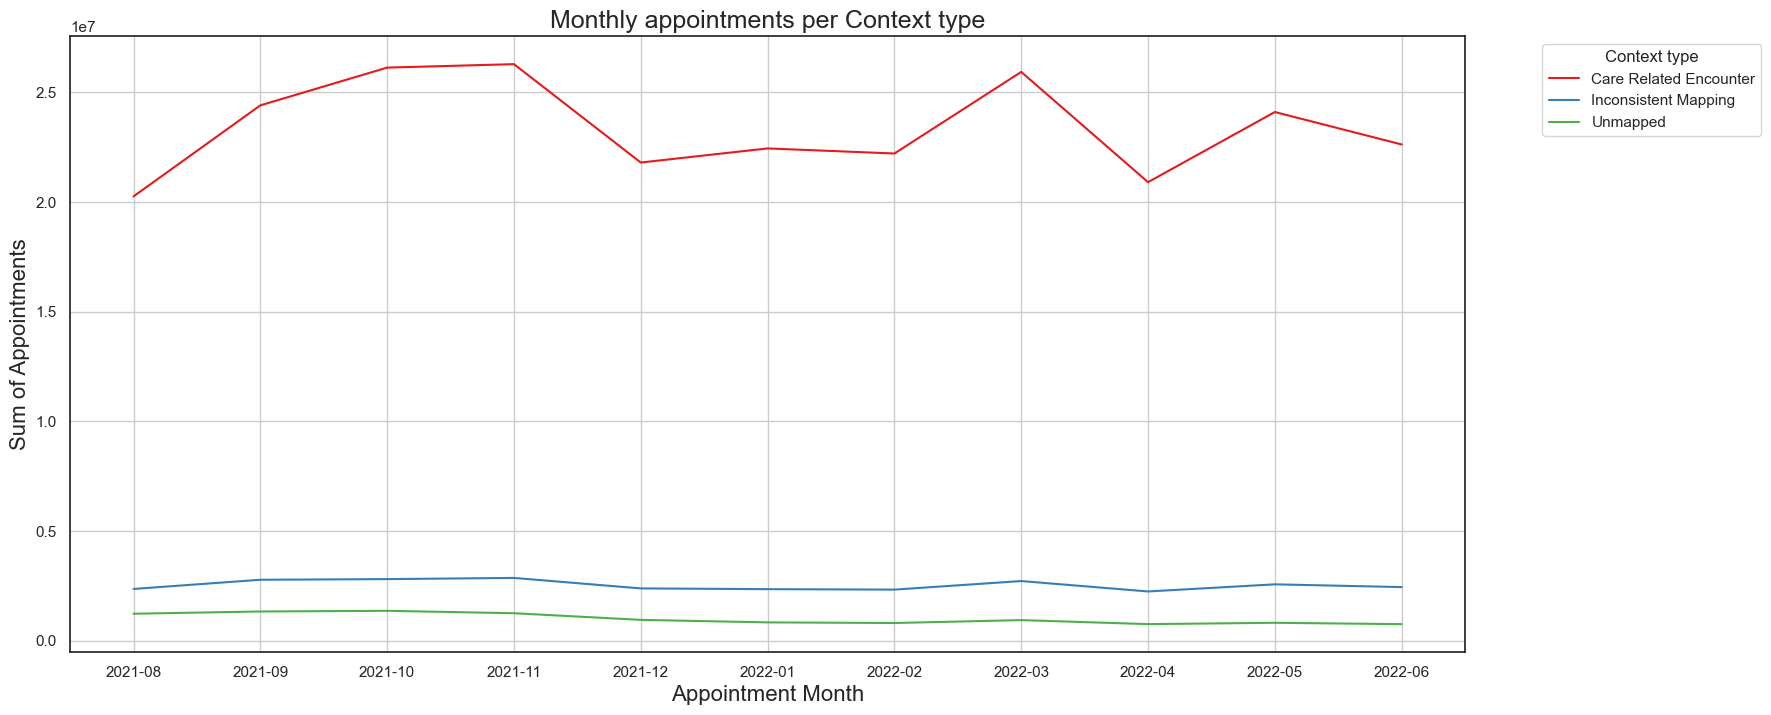

In [40]:
# Create a lineplot.
plt.figure(figsize=(18, 8))
sns.lineplot(x='appointment_month', y='sum_of_appointments', hue='context_type', data=nc_ct, ci=None, linestyle='-', palette='Set1')
plt.title('Monthly appointments per Context type', fontsize=18)
plt.xlabel('Appointment Month', fontsize=16)
plt.ylabel('Sum of Appointments', fontsize=16)
plt.legend(title='Context Type', fontsize=14)

#Move the legend outside the graph
plt.legend(title='Context type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### Interpretation:

- Care Related encounters consistently dominate monthly appointments, with the highest proportion among context types.
- Inconsistent Mapping and Unmapped context types maintain a relatively low and steady presence compared to Care Related encounters.
- Monthly appointments for Care Related encounters show a steady increase from August 2021 to October 2021, plateauing until November 2021, and rapidly decreasing until December 2021. 
- Subsequent appointments per month for Care Related encounters fluctuated until June 2022.

##### Service setting

In [41]:
# Group by the appointment month and service setting summing the appointments for each month 
nc_ss = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Assigning new column names to the DataFrame 
nc_ss.columns = ['appointment_month', 'service_setting', 'sum_of_appointments']

# View the first 5 rows
nc_ss.head()

,appointment_month,service_setting,sum_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


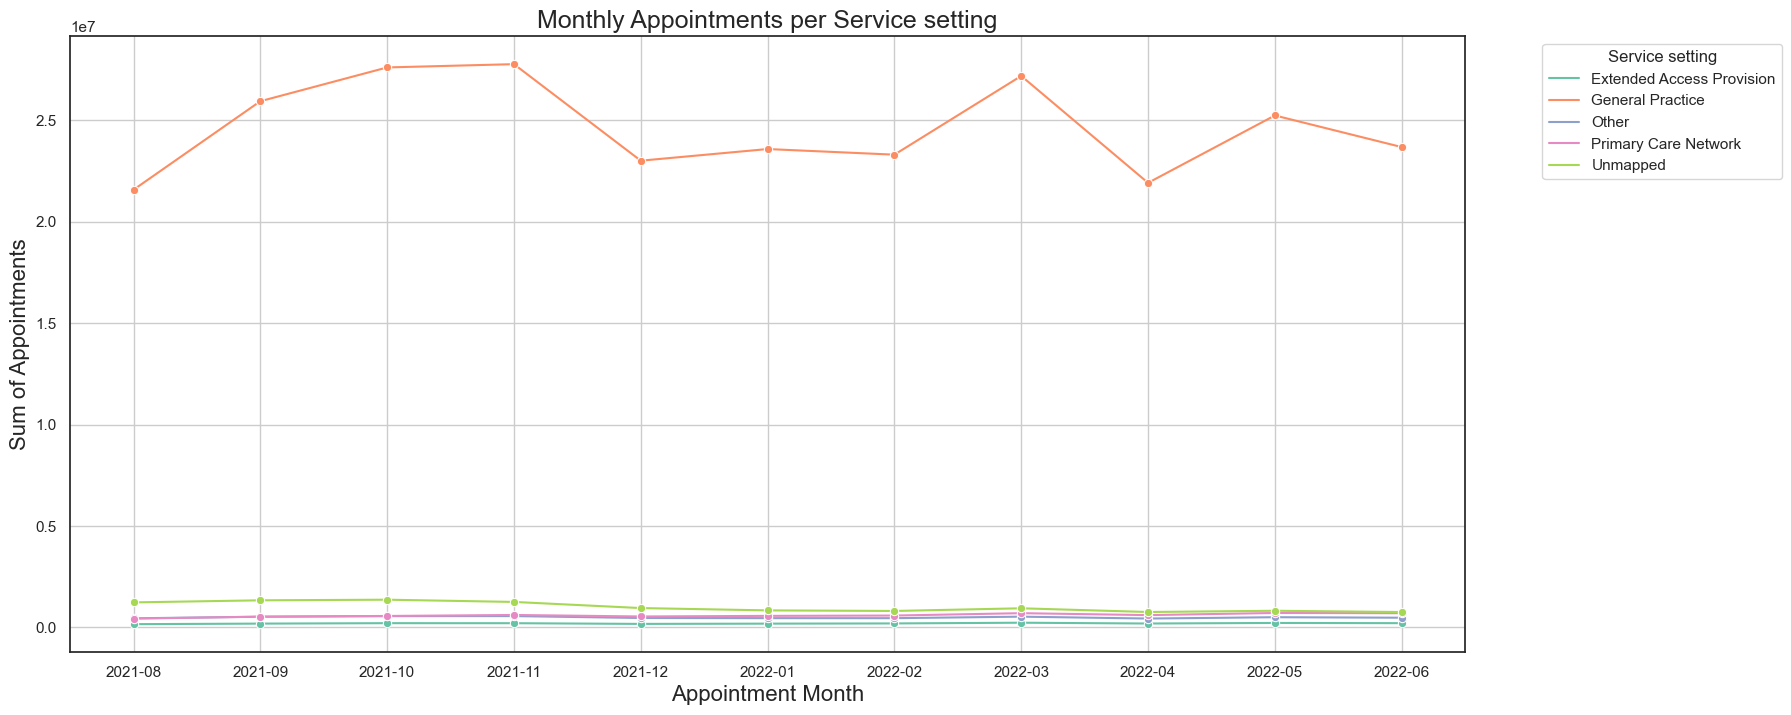

In [42]:
# Create a lineplot.
plt.figure(figsize=(18, 8))
sns.lineplot(x='appointment_month', y='sum_of_appointments', hue='service_setting', data=nc_ss, ci=None, marker='o', linestyle='-', palette='Set2')
plt.title('Monthly Appointments per Service setting', fontsize=18)
plt.xlabel('Appointment Month', fontsize=16)
plt.ylabel('Sum of Appointments', fontsize= 16)
plt.legend(title='Service Setting', fontsize=14)

#Move the legend outside the graph
plt.legend(title='Service setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### Interpretation:

- General Practice consistently dominates monthly appointments, with the highest proportion among service settings.
- Extended Access Provision, Other, Primary Care Network and Unmapped service settings remained relatively low and steady. 
- Monthly appointments for General Practice  show a steady increase from August 2021 to October 2021, plateauing until November 2021, and rapidly decreasing until December 2021. 
- Subsequent appointments per month for General Practice fluctuated until June 2022.

**National categories:**

In [43]:
# Group by the appointment month and national category summing the appointments for each month 
nc_nc = nc.groupby(['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index()

# Assigning new column names to the DataFrame 
nc_nc.columns = ['appointment_month', 'national_category', 'sum_of_appointments']

# View the output
nc_nc

,appointment_month,national_category,sum_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045
...,...,...,...
193,2022-06,Social Prescribing Service,55066
194,2022-06,Structured Medication Review,187800
195,2022-06,Unmapped,758640
196,2022-06,Unplanned Clinical Activity,274491


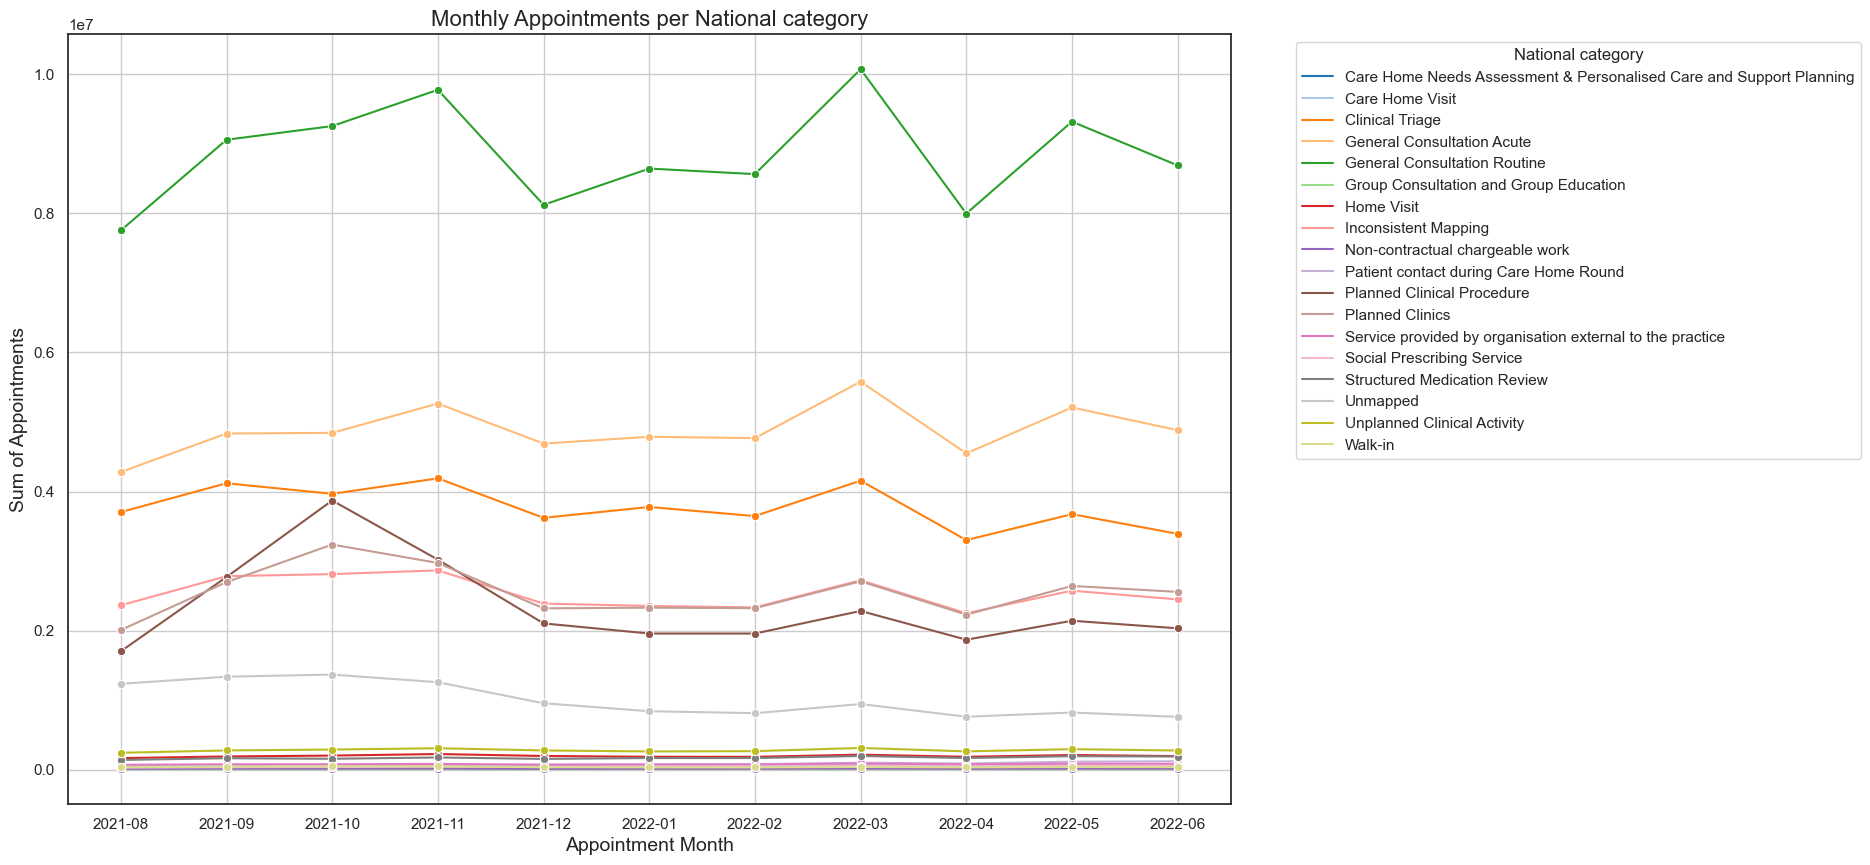

In [44]:
# Plot the appointments over the available date range, and review the national categories for months.
plt.figure(figsize=(15, 10))

# Use a different color palette, such as 'viridis'.
sns.lineplot(x='appointment_month', y='sum_of_appointments', hue='national_category', data=nc_nc, ci=None, marker='o', linestyle='-', palette='tab20')
plt.title('Monthly Appointments per National category', fontsize=16)
plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Sum of Appointments', fontsize=14)
plt.legend(title='National Category')

#Move the legend outside the graph
plt.legend(title='National category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### Interpretation:

- General Consulation Routine consistently dominates monthly appointments, followed by General Consulation Acute and Clinical Triage.
- Notably, there was a surge in appointments within the context of planned clinical procedures in November 2021, followed by a rapid decline.
- Appointments through planned clinics and inconsistent mapping context types exhibited noticeable fluctuations over time.

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season.

**Summer:**


In [45]:
# Convert 'appointment_month' data types to Datetime format
nc_ss['appointment_month'] = pd.to_datetime(nc_ss['appointment_month'])

# Define the summer months
summer_months = ['2021-06', '2021-07', '2021-08']

# Filter data for the summer season
summer_data = nc_ss[nc_ss['appointment_month'].dt.strftime('%Y-%m').isin(summer_months)]

# View the filtered data for the summer season
summer_data

,appointment_month,service_setting,sum_of_appointments
0,2021-08-01,Extended Access Provision,160927
1,2021-08-01,General Practice,21575852
2,2021-08-01,Other,449101
3,2021-08-01,Primary Care Network,432448
4,2021-08-01,Unmapped,1233843


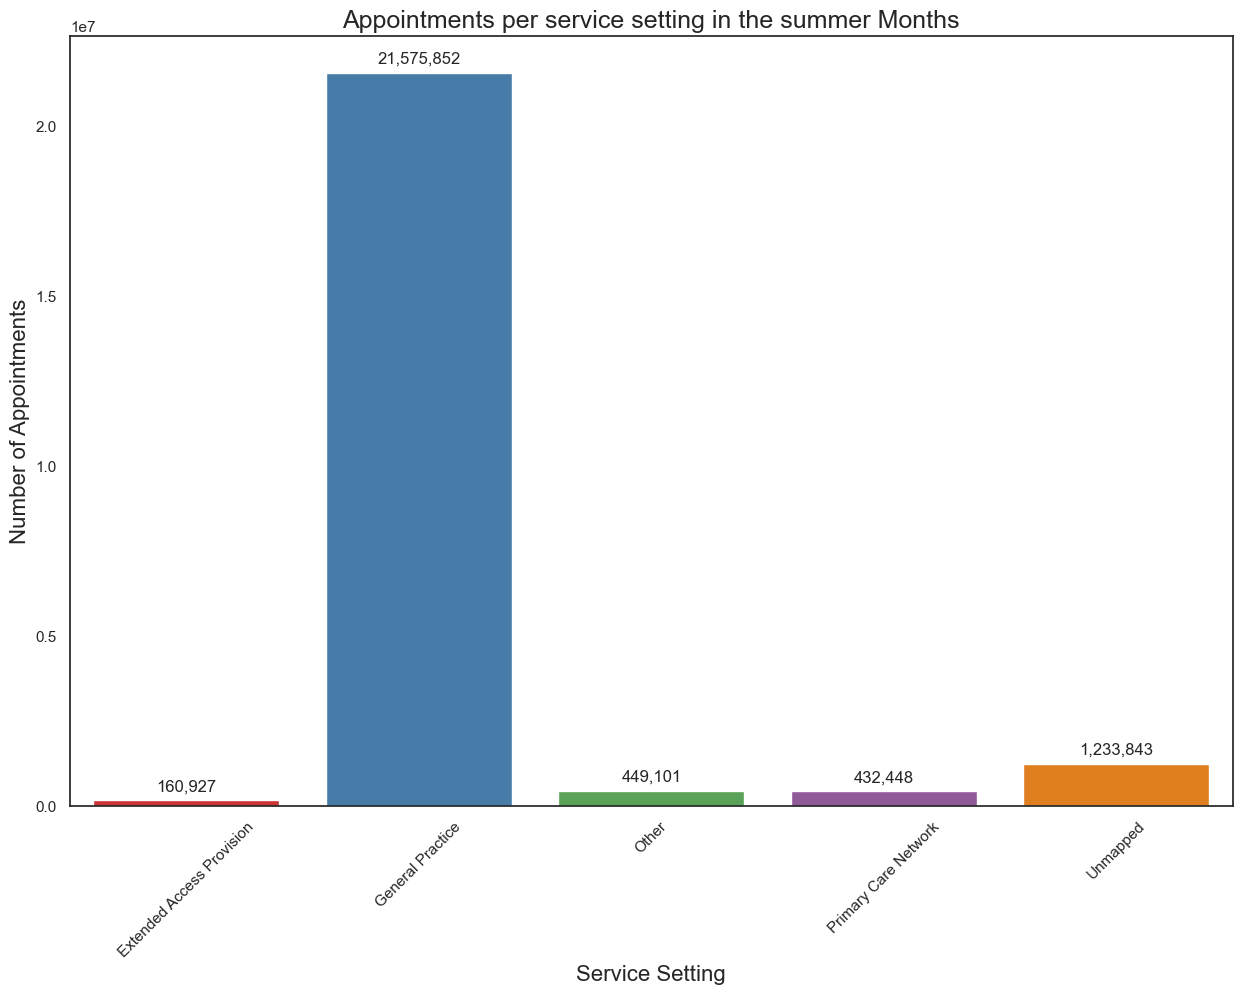

In [46]:
# Create a bar chart
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='service_setting', y='sum_of_appointments', data=summer_data, palette='Set1')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add title and axis labels.
plt.title('Appointments per service setting in the summer Months', fontsize=18)
plt.xlabel('Service Setting', fontsize=16)
plt.ylabel('Number of Appointments', fontsize=16)
plt.xticks(rotation=45)
plt.show()

#### Interpretation:

A bar chart has been created here as the summer months data does not contain data points spread across the specified months. All the appointments occur on 2021-08-01, so a bar chart is more appropriate in this instance. During the summer months, General Practice had the highest sum of appointments.

**Autumn:**

In [47]:
# Define the Autumn months
autumn_months = ['2021-09', '2021-10', '2021-11']

# Filter data for the Autumn season
autumn_data = nc_ss[nc_ss['appointment_month'].dt.strftime('%Y-%m').isin(autumn_months)]

# View the filtered data for the Autumn season
autumn_data

,appointment_month,service_setting,sum_of_appointments
5,2021-09-01,Extended Access Provision,187906
6,2021-09-01,General Practice,25940821
7,2021-09-01,Other,527174
8,2021-09-01,Primary Care Network,530485
9,2021-09-01,Unmapped,1336115
10,2021-10-01,Extended Access Provision,209539
11,2021-10-01,General Practice,27606171
12,2021-10-01,Other,556487
13,2021-10-01,Primary Care Network,564981
14,2021-10-01,Unmapped,1366656


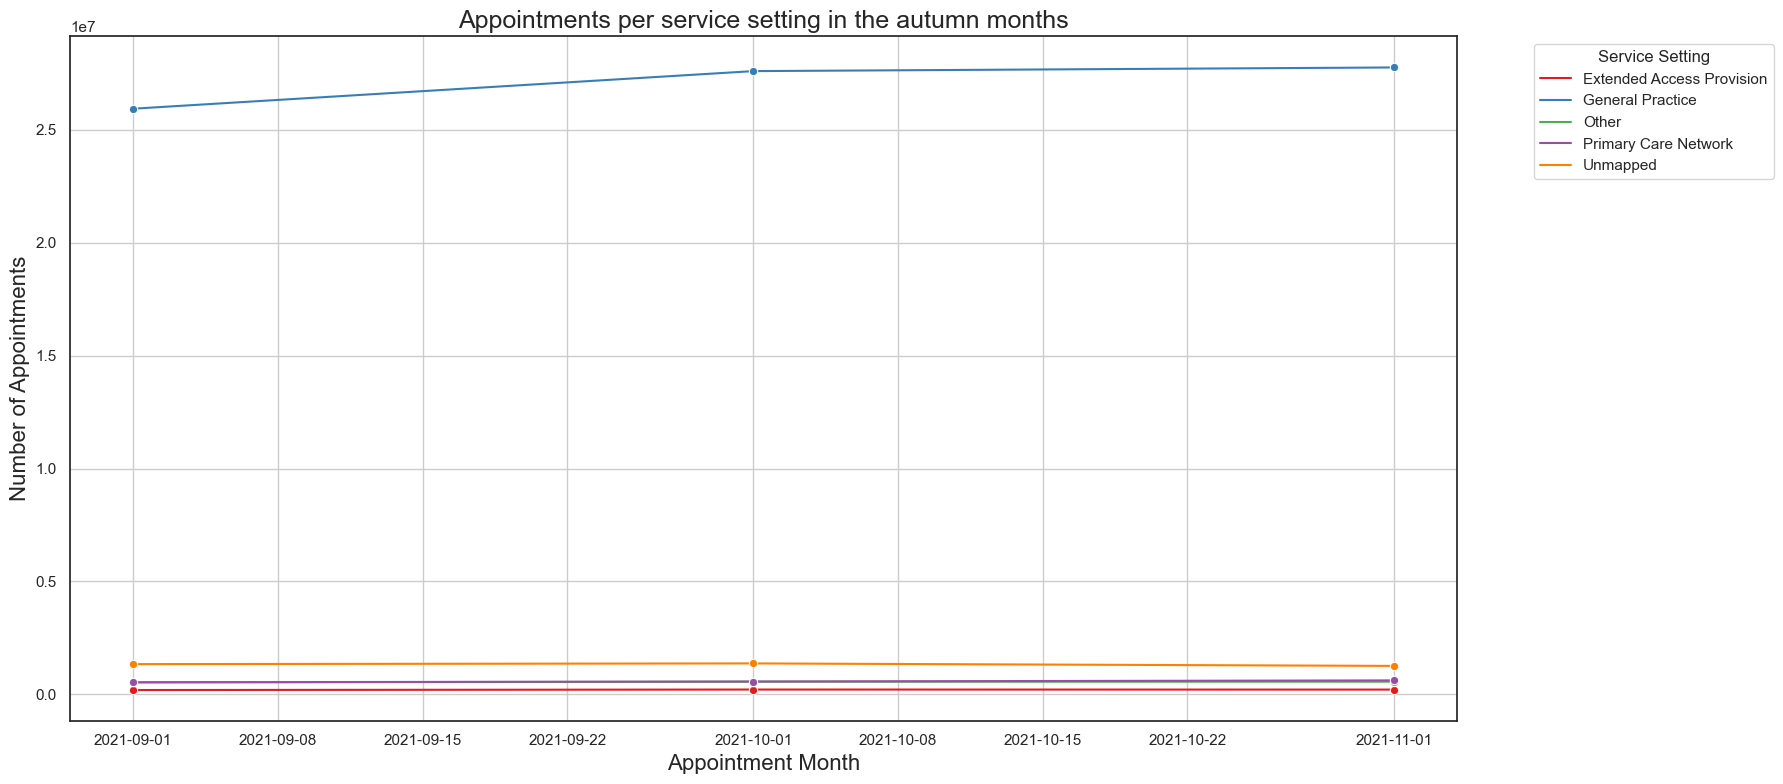

In [48]:
# Visualise the subset using a lineplot.
plt.figure(figsize=(18, 8))
sns.lineplot(x='appointment_month', y='sum_of_appointments', data=autumn_data, hue='service_setting', marker='o', palette='Set1')
plt.title('Appointments per service setting in the autumn months', fontsize= 18)
plt.xlabel('Appointment Month', fontsize = 16)  
plt.ylabel('Number of Appointments', fontsize= 16)
plt.grid(True)

#Move the legend outside the graph
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Winter:**

In [49]:
# Define the winter months
winter_months = ['2021-12', '2022-01', '2022-02']

# Filter data for the winter season
winter_data = nc_ss[nc_ss['appointment_month'].dt.strftime('%Y-%m').isin(winter_months)]

# View the filtered data for the winter season
winter_data

,appointment_month,service_setting,sum_of_appointments
20,2021-12-01,Extended Access Provision,173504
21,2021-12-01,General Practice,23008818
22,2021-12-01,Other,464718
23,2021-12-01,Primary Care Network,539479
24,2021-12-01,Unmapped,954257
25,2022-01-01,Extended Access Provision,186375
26,2022-01-01,General Practice,23583053
27,2022-01-01,Other,457440
28,2022-01-01,Primary Care Network,569044
29,2022-01-01,Unmapped,839562


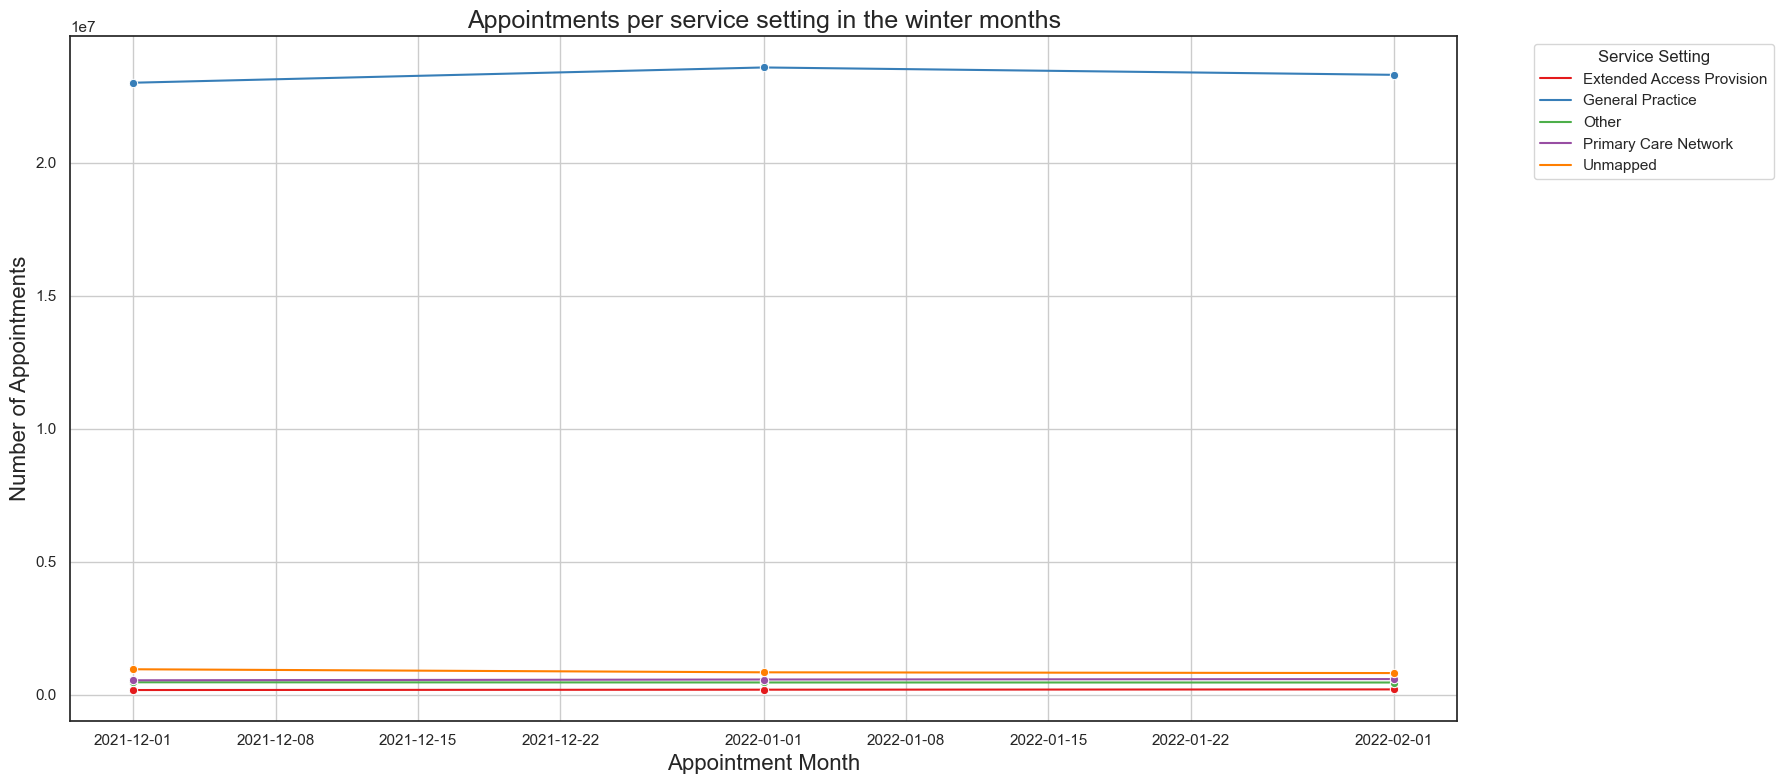

In [50]:
# Visualise the subset using a lineplot.
plt.figure(figsize=(18, 8))
sns.lineplot(x='appointment_month', y='sum_of_appointments', data=winter_data, hue='service_setting', marker='o', palette='Set1')
plt.title('Appointments per service setting in the winter months',fontsize= 18 )
plt.xlabel('Appointment Month', fontsize= 16)  
plt.ylabel('Number of Appointments', fontsize= 16)
plt.grid(True)

#Move the legend outside the graph
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Spring:**

In [51]:
# Define the spring months
spring_months = ['2022-03', '2022-04', '2022-05']

# Filter data for the spring season
spring_data = nc_ss[nc_ss['appointment_month'].dt.strftime('%Y-%m').isin(spring_months)]

# View the filtered data for the spring season
spring_data

,appointment_month,service_setting,sum_of_appointments
35,2022-03-01,Extended Access Provision,231905
36,2022-03-01,General Practice,27187368
37,2022-03-01,Other,530677
38,2022-03-01,Primary Care Network,702176
39,2022-03-01,Unmapped,942912
40,2022-04-01,Extended Access Provision,192284
41,2022-04-01,General Practice,21916791
42,2022-04-01,Other,437402
43,2022-04-01,Primary Care Network,606270
44,2022-04-01,Unmapped,760313


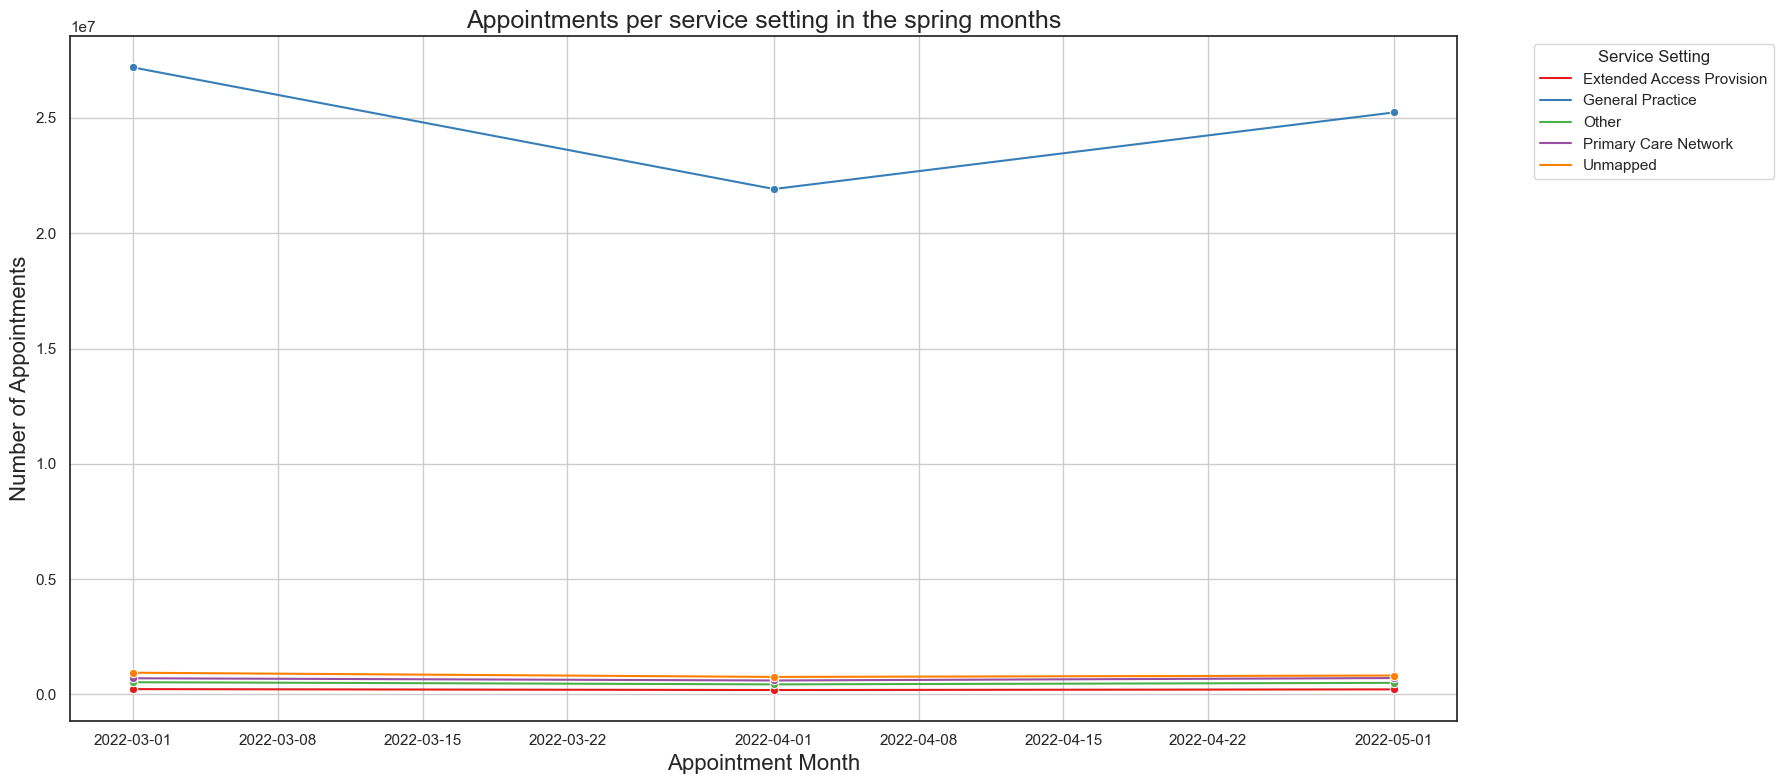

In [52]:
# Visualise the subset using a lineplot.
plt.figure(figsize=(18, 8))
sns.lineplot(x='appointment_month', y='sum_of_appointments', data=spring_data, hue='service_setting', marker='o', palette='Set1')
plt.title('Appointments per service setting in the spring months', fontsize= 18)
plt.xlabel('Appointment Month', fontsize= 16)  
plt.ylabel('Number of Appointments', fontsize= 16)
plt.grid(True)

#Move the legend outside the graph.
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Interpretation

- General practice consistently dominates total appointments across all seasons with other service settings maintaining relatively low appointment volumes. 
- Autumn exhibits a steady rise in appointment.
- Winter appointments peak in January, gradually declining thereafter. 
- Spring experiences a peak in appointment in early March, followed by a rapid decline until April, after which appointments begin to increase again.



## Additional questions


##### 1) What is the count of attended appointments, and which appointment mode was utilised for these appointments?

In [53]:
# Create a DataFrame that shows the count of attended appointments grouped by the 'appointment_mode'.
appoinment_mode_attended = ar[ar['appointment_status'] == 'Attended'].groupby('appointment_mode')\
.size().reset_index(name='attended_appointments')

#View the output.
appoinment_mode_attended

,appointment_mode,attended_appointments
0,Face-to-Face,64478
1,Home Visit,48608
2,Telephone,60796
3,Unknown,29526
4,Video/Online,28729


##### Analytical approach

- A DataFrame named ‘appointment_mode_attended’ was created to show the count of attended appointments, grouped by the ‘appointment_mode’ column.
- First the ‘ar’ DataFrame was filtered to include only rows where appointments were ‘Attended’.
- Then the .groupby( ) method was used on the ‘appointment_mode’ column to group the data based on different appointment modes.
- The .size ( ) method calculates the count of attended appointments within each group.
- The new DataFrame columns were adjusted using the .reset_index ( ) and rename method.


##### Bar chart illustrating the number of attended appointments per appointment mode

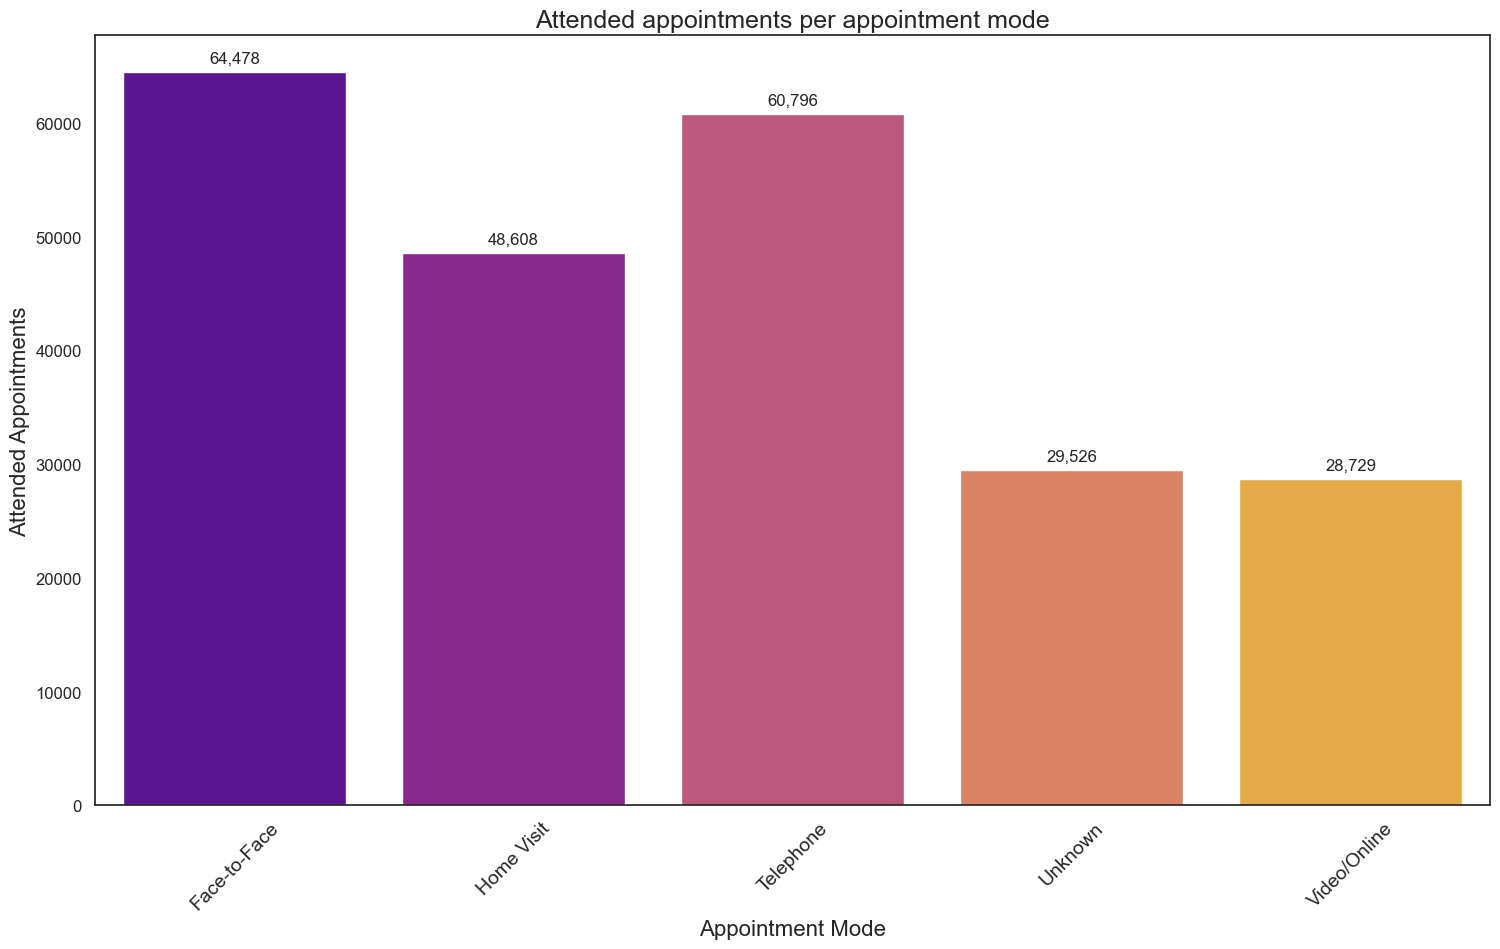

In [54]:
# Create a bar chart.
plt.figure(figsize=(18, 10))
sns.barplot(x='appointment_mode', y='attended_appointments', data=appoinment_mode_attended, palette='plasma')

# Add data labels.
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
# Add title and axis labels.
plt.title('Attended appointments per appointment mode', fontsize=18)
plt.xlabel('Appointment Mode', fontsize=16)
plt.ylabel('Attended Appointments', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=12)
plt.show()

##### 2) What is the count of unattended appointments, and which appointment mode was utilised for these appointments?

In [55]:
# Create a DataFrame that shows the count of unattended appointments grouped by the 'appointment_mode'.
appoinment_mode_not_attended = ar[ar['appointment_status'] == 'DNA'].groupby('appointment_mode')\
.size().reset_index(name='unattended_appointments')

# View the ouput.
appoinment_mode_not_attended

,appointment_mode,unattended_appointments
0,Face-to-Face,53770
1,Home Visit,21386
2,Telephone,49696
3,Unknown,23784
4,Video/Online,14724


##### Analytical approach

- A DataFrame named ‘appointment_mode_not_attended’ was created to show the count of attended appointments, grouped by the ‘appointment_mode’ column.
- First the ‘ar’ DataFrame was filtered to include only rows where appointments were ‘DNA’.
- Then the .groupby( ) method was used on the ‘appointment_mode’ column to group the data based on different appointment modes.
- The .size ( ) method calculates the count of attended appointments within each group.
- The new DataFrame columns were adjusted using the .reset_index ( ) and rename method. 


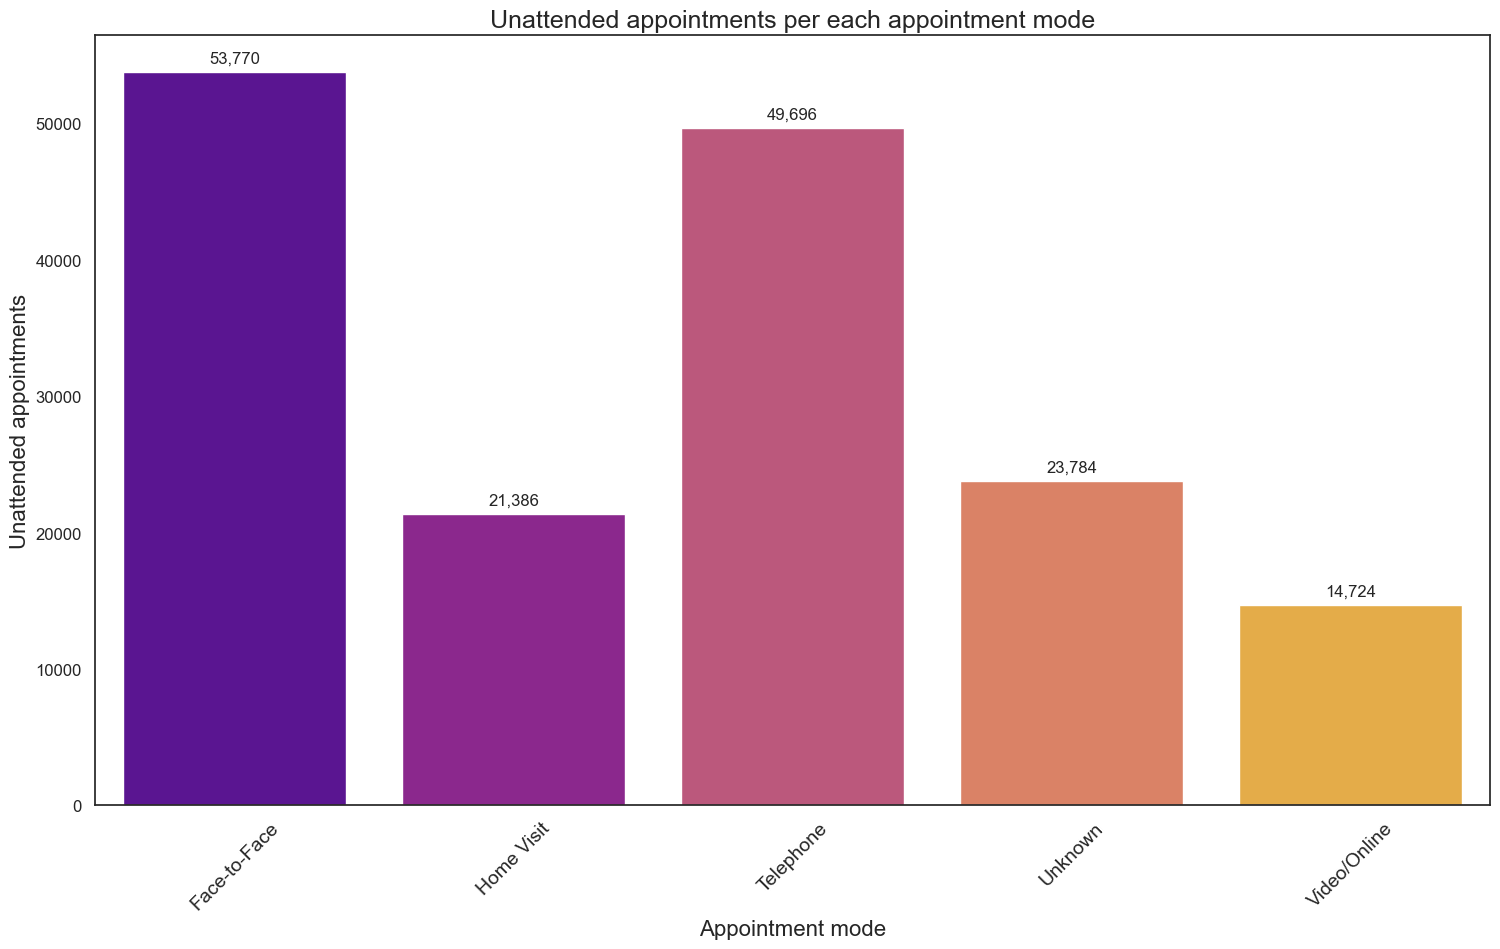

In [56]:
# Create a Bar chart
plt.figure(figsize=(18, 10))
sns.barplot(x='appointment_mode', y='unattended_appointments', data=appoinment_mode_not_attended, palette='plasma')

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add title and axis labels.
plt.title('Unattended appointments per each appointment mode', fontsize=18)
plt.xlabel('Appointment mode', fontsize=16)
plt.ylabel('Unattended appointments',fontsize=16)
plt.xticks(rotation=45,fontsize=14)
plt.yticks(fontsize=12)
plt.show()

##### Interpretation:
The code to answer the question: How many appointments were attended and unattended and what setting did these appointments take place? highlight the distribution of attended and unattended appointments across distinct appointment modes, in turn providing insight on how patients engage with healthcare services based on different modes of appointment delivery. 

Attended appointments and appointment mode examples:
- 64, 478 attended appointments were face-to-face 
- 48, 608 were Home visits
- 28, 729 were Video/online. 


Unattended appointments and appointment mode examples:
- 53,770 appointments were Face-to-Face
- 21,386 were Home visits 
- 14,724 were Video/Online

Notably, for attended and unattended appointments unknown appointment modes occurred more frequently than Video/Online appointments.
There are a couple of limitations to discuss in light of this insight:
1. The appointment mode is determined locally by practices, which introduces subjectivity and potential variation in interpretation, leading to different logging practices. For example, a video/online appointment may be classified as face-to-face in one practice and different in another. 
2. The inability of practices using the Cegedim GP system to provide data on appointment mode causes a higher proportion of appointments to be categorised as ‘Unknown’. 
This dual challenge of potential subjectivity/misinterpretation and system-specific data increases uncertainty in the accuracy of appointment mode date, necessitating caution in interpretation and drawing definitive conclusions.  


##### 3) How does the attendance of appointments vary across different healthcare professional types, and what is the distribution of attended appointments among these types?

In [57]:
# Create a DataFrame that shows the count of attended appointments grouped by 'hcp_type'
appoinment_attended_hcp = ar[ar['appointment_status'] == 'Attended'].groupby('hcp_type')\
    .size().reset_index(name='attended_appointments').sort_values(by='attended_appointments', ascending=False)

# View the resulting DataFrame
appoinment_attended_hcp

,hcp_type,attended_appointments
1,Other Practice staff,90852
0,GP,87868
2,Unknown,53417


##### Analytical approach

- A DataFrame named ‘appointment_attended_hcp’ was created to show the count attended apppointments, grouped by the ‘hcp_type’ column.
- The ‘ar’ DataFrame was filtered to include the rows were ‘appointment status’ was ‘Attended’.
- The .groupby ( ) method on the’hcp_type’ column was utilised to group the data based on different healthcare professional types.
- .size( ) calculated the count of attended appointments and the column names were adjusted using the .reset_index( ) and rename method.
- The DataFrame was then sorted by count of attended appointments in descending order.

##### Interpretation:

This DataFrame provides insight into the frequency of attended appointments among different healthcare professional types. Notably,  Other Practice Staff’ facilitated a signficial number of appointments 90,852 , while GP’s were actively involved in 87,868 appointments. Having said that, it is important to highlight that a considerable proportion (53,417) falls under the ‘Unknown’ category, which represent null/missing data types. This highlights potential gaps and challenges in the methods used to capture healthcare professional information, emphasising the need for further investigation.

##### 4) What is the distribution of attended appointments across various healthcare professionals and appointment modes?

In [58]:
# Create a DataFrame that shows the count of attended appointments grouped by the 'appointment_mode' and 'hcp_type'.
appoinment_mode_attended_subset = ar[ar['appointment_status'] == 'Attended'].groupby(['appointment_mode', 'hcp_type'])\
    .size().reset_index(name='attended_appointments')

# View the resulting DataFrame.
appoinment_mode_attended_subset

,appointment_mode,hcp_type,attended_appointments
0,Face-to-Face,GP,24729
1,Face-to-Face,Other Practice staff,24972
2,Face-to-Face,Unknown,14777
3,Home Visit,GP,16765
4,Home Visit,Other Practice staff,20749
5,Home Visit,Unknown,11094
6,Telephone,GP,24171
7,Telephone,Other Practice staff,24200
8,Telephone,Unknown,12425
9,Unknown,GP,7039


##### Analytical approach

- A DataFrame name ‘appointment_mode_attended_subset’ to display the count of attended appointments grouped by ‘appointment_mode’ and ‘hcp_type’.
- The ‘ar’ DataFrame was filtered to include rows where appointments were ‘Attneded’.
- The .groupby( ) method was used to group the appointment_mode’ and ‘hcp_type’ columns.
- .size( ) method counted the attended appointments within each group, the column names were adjusted using the .reset_index ( ) and rename methods (see figure 12). See figure 13 for chart visualisation.

#### Interpretation:

##### Face-to-Face Appointments:

- GP: 24,729 attended appointments
- Other Practice Staff: 24,972 attended appointments
- Unknown: 14,777 attended appointments

##### Home Visit Appointments:

- GP: 16,765 attended appointments
- Other Practice Staff: 20,749 attended appointments
- Unknown: 11,094 attended appointments

##### Telephone Appointments:

- GP: 24,171 attended appointments
- Other Practice Staff: 24,200 attended appointments
- Unknown: 12,425 attended appointments

##### Unknown Appointment Mode:

- GP: 7,039 attended appointments
- Other Practice Staff: 7,723 attended appointments
- Unknown: 14,764 attended appointments

##### Video/Online Appointments:

- GP: 15,164 attended appointments
- Other Practice Staff: 13,208 attended appointments
- Unknown: 357 attended appointments



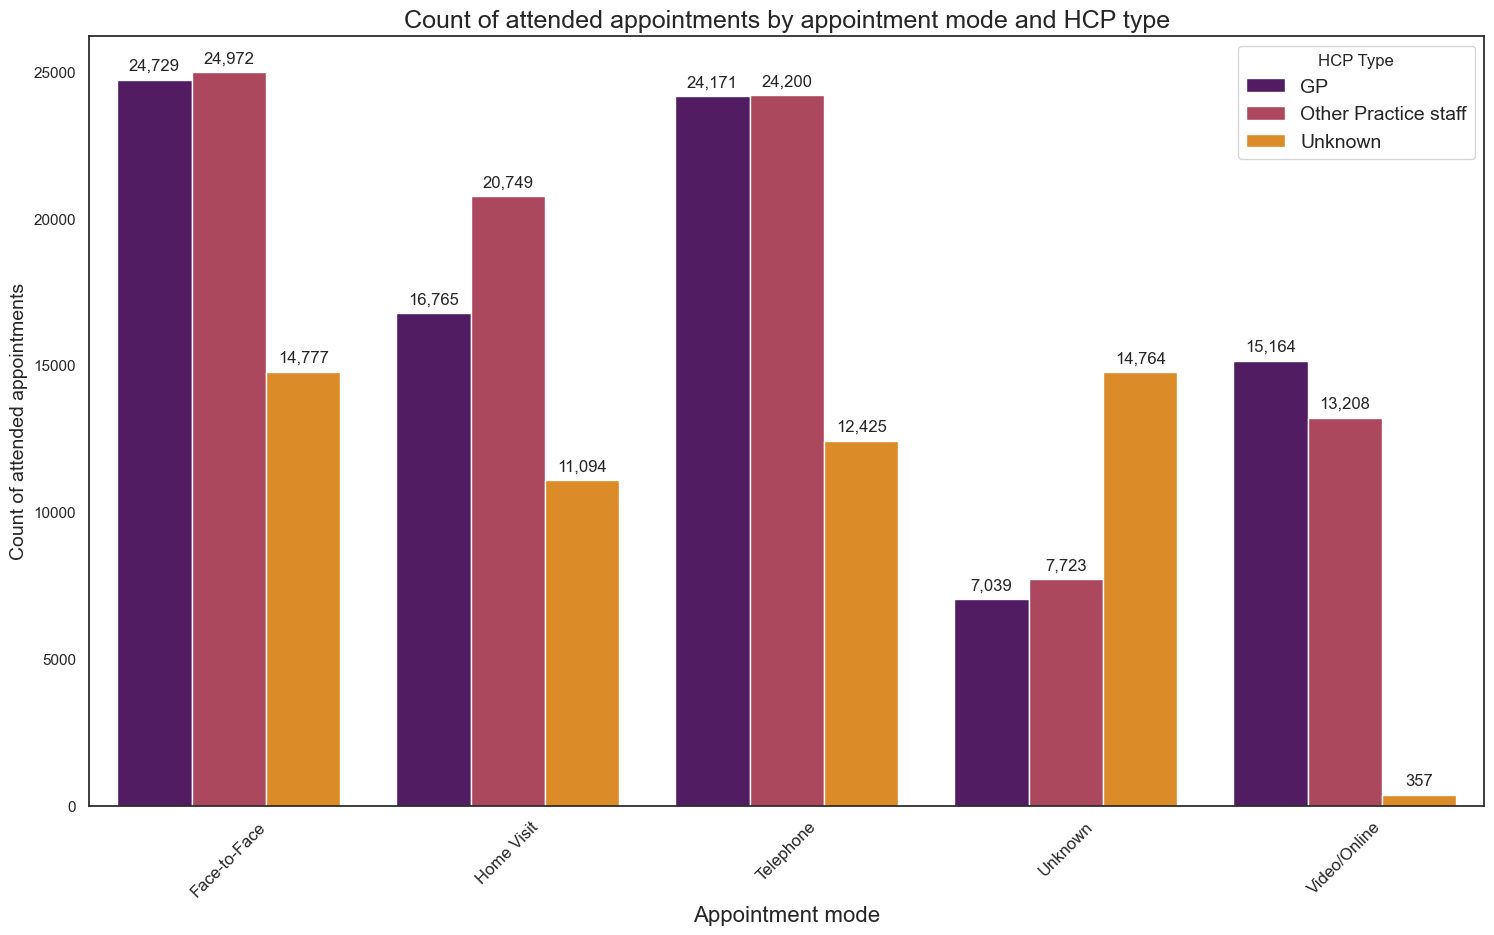

In [59]:
# Create a bar chart.
plt.figure(figsize=(18, 10))
sns.barplot(x='appointment_mode', y='attended_appointments', hue='hcp_type', data=appoinment_mode_attended_subset, palette='inferno')

# Add data labels.
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust bar width and add grid lines.
plt.title('Count of attended appointments by appointment mode and HCP type', fontsize=18)
plt.xlabel('Appointment mode', fontsize=16)
plt.ylabel('Count of attended appointments', fontsize=14)
plt.legend(title='HCP Type', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

#### Interpretation:

This ‘appoinment_mode_attended_subset’ DataFrame provides a detailed view of how attended appointments are distributed across different appointment modes and healthcare professional types. To make enhance readability of this particular DataFrame, a bar chart was created. Generally face-to-face and telephone appointment modes were the most attended. 'Other Practice staff' were the highest professional type to consult in face-to-face appointments, followed by GP's. Both ‘Other practice staff ‘and GP's appear to consult in similar proportions during telephone appointments.

### 5) Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [60]:
# Libraries and settings needed for analysis.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display.
pd.options.display.max_colwidth = 200

In [61]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
print(tweets.shape)
tweets.head()

(1174, 10)


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [62]:
# Explore the metadata and data set.
print(tweets.info())
tweets.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB
None


,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [63]:
# Find the top retweeted tweet.
top_retweeted = tweets.nlargest(1, 'tweet_retweet_count')

# Print only the relevant columns
print("The most retweeted tweet")
top_retweeted[['tweet_full_text', 'tweet_retweet_count']]

The most retweeted tweet


,tweet_full_text,tweet_retweet_count
263,RT @UltimaLionsDen: Temitope is looking to boost efficiency in the Health industry with his app- \nWe-Care Africa. \n\nWas his pitch in good s…,303


In [64]:
# Find the top favorited tweet.
top_favorited = tweets.nlargest(1, 'tweet_favorite_count')

# Print only the relevant columns
print("The most favourited tweet")
top_favorited[['tweet_full_text', 'tweet_favorite_count']]

The most favourited tweet


,tweet_full_text,tweet_favorite_count
1156,Lipid-Lowering Drugs\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStudents #medstudenttwitter #lipid \n\nCredit: ...,42


##### Interpretation:

Understanding the distrubution of retweet and favourite counts can help to identify patterns in user engagement and which tweets are most popular. Above, are two code snippests showing the most popular tweets calculated using the tweet_retweet_count and tweet_favorite_count columns. Tweets with a higher retweets and favourite count may highlight the most popular and enaging content. However, in this instance I dont believe it would be useful to only look at the retweeted and favourited tweets, as each tweet is user specific and it is not clear how these tweets were sourced. Thus, I think we could pull more valuable insight from exploring the hashtags used within each tweet to uncover which keywords are most popular among users and whether they are utlised within the context of healthcare. 

In [65]:
# Create a new DataFrame containing only the text.
tweets_text = tweets[['tweet_full_text']]

# View the DataFrame.
print(tweets_text.shape)
tweets_text.head()

(1174, 1)


,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."


In [66]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())
            
# Create a Pandas Series using tags       
tweets_hastag_list = pd.Series(tags).value_counts()

# Display the first 30 records.
print(f"First 30 records in the tweets list")
tweets_hastag_list.head(30)

First 30 records in the tweets list


#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [67]:
# Convert the Series to a DataFrame and reset the index
data = tweets_hastag_list.reset_index()

# Rename the columns to 'word' and 'count'
data.columns = ['word', 'count']

# View the first 10 rows
print(data.shape)
data.head(10)

(1754, 2)


,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


In [68]:
# Display records where the count is larger than 10.
filtered_data = data[data['count'] > 10]

# View the ouput
filtered_data                     

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


##### What are the top 10 hashtags

In [69]:
# Filter and select the top 10 word counts
top10_hashtags = filtered_data.nlargest(10, 'count')

# View the output
top10_hashtags

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


#### Interpretation:

The dataset contains information on the frequency of specific hashtags in tweets. The most prevalent hashtag is "#healthcare" with 716 occurrences, followed by "#health" with 80, and "#medicine" with 41. Other notable hashtags include "#ai," "#job," "#medical," "#strategy," "#pharmaceutical," "#digitalhealth," and "#pharma" with varying frequencies.

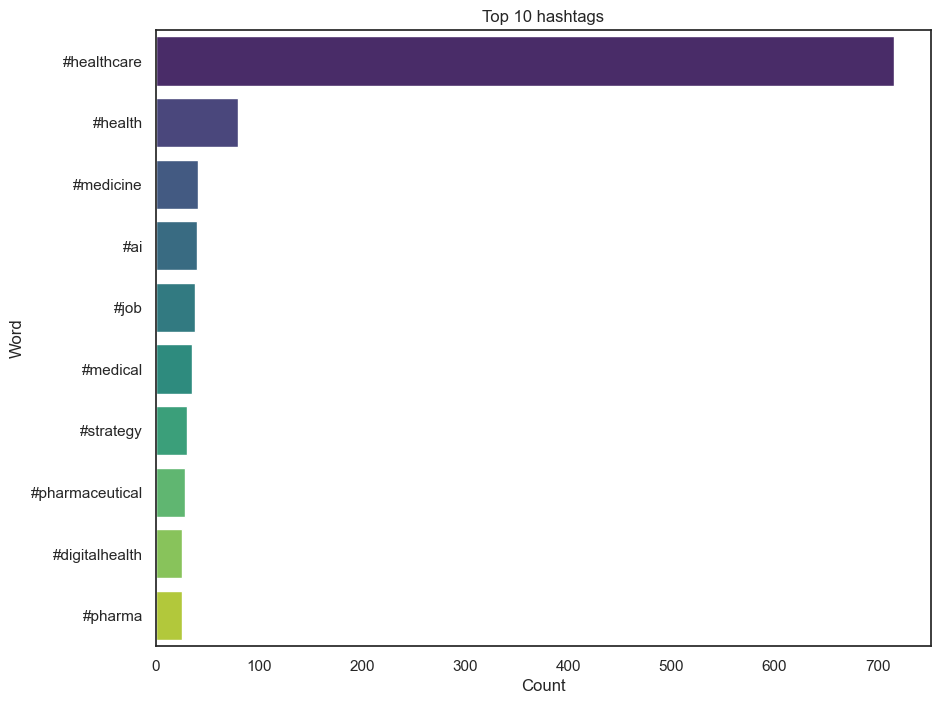

In [70]:
# Adjust figure size
plt.figure(figsize=(10, 8))

# Create Bar plot
sns.barplot(x='count', y='word', data=top10_hashtags, estimator=sum, palette='viridis')
plt.title('Top 10 hashtags')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

#### Interpretation:

The bar chart effectively displays the frequency of the top 10 hashtags used in X (Twitter) offering a concise comparison of their counts. Understanding hashtag usage is crucial for enhancing post engagement and highlighting popular topics. 

### 6) Investigate the main concerns posed by the NHS. 

In [71]:
# View the ar DataFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [72]:
# Determine the minimum and maximum dates in the ad DataFrame.
min_max_dates_ar = ar['appointment_month'].agg(['min', 'max'])

"""code snippet calculates the minimum and maximum dates in the 'appointment_month' 
column of the ar DataFrame"""

# Print the result
print("Minimum and maximum dates in the ar DataFrame:")
print(min_max_dates_ar)

Minimum and maximum dates in the ar DataFrame:
min   2020-01-01
max   2022-06-01
Name: appointment_month, dtype: datetime64[ns]


In [73]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_filtered_date = ar[ar['appointment_month'] >= '2021-08']

# View the output.
ar_filtered_date

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08-01,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08-01,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08-01,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08-01,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08-01,Attended,GP,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...,...
596816,E54000050,2022-06-01,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06-01,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,17


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [74]:
# Create an aggregated data set to review the different features.
ar_agg = ar.groupby(['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', 'time_between_book_and_appointment'])\
['count_of_appointments'].sum().reset_index()

# Rename column count_of_appointments to sum_of_appointments.
ar_agg = ar_agg.rename(columns={'count_of_appointments': 'sum_of_appointments'})

# View the output.
ar_agg

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,sum_of_appointments
0,2020-01-01,GP,Attended,Face-to-Face,1 Day,653846
1,2020-01-01,GP,Attended,Face-to-Face,15 to 21 Days,620789
2,2020-01-01,GP,Attended,Face-to-Face,2 to 7 Days,1723834
3,2020-01-01,GP,Attended,Face-to-Face,22 to 28 Days,421189
4,2020-01-01,GP,Attended,Face-to-Face,8 to 14 Days,1123186
...,...,...,...,...,...,...
10134,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,5494
10135,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,5115
10136,2022-06-01,Unknown,Unknown,Unknown,Same Day,1914
10137,2022-06-01,Unknown,Unknown,Unknown,Unknown / Data Quality,53


##### Determine average utilisation of services:

In [75]:
# Determine the total number of appointments per month.
ar_df = ar.groupby(['appointment_month'])['count_of_appointments'].sum().reset_index()

# Rename the column to 'sum_of_appointments'
ar_df = ar_df.rename(columns={'count_of_appointments': 'sum_of_appointments'})

# Add a new column to indicate the average utilisation of services.
ar_df['utilisation'] = ar_df['sum_of_appointments'] / 30

# Monthly aggregate / 30 to get to a daily value.
ar_df['utilisation'] = ar_df['utilisation'].round(1)

# View the first 5 rows of the DataFrame and the datatypes.
ar_df

,appointment_month,sum_of_appointments,utilisation
0,2020-01-01,27199296,906643.2
1,2020-02-01,24104621,803487.4
2,2020-03-01,24053468,801782.3
3,2020-04-01,16007881,533596.0
4,2020-05-01,16417212,547240.4
5,2020-06-01,20690805,689693.5
6,2020-07-01,22491437,749714.6
7,2020-08-01,20150520,671684.0
8,2020-09-01,26714255,890475.2
9,2020-10-01,28301932,943397.7


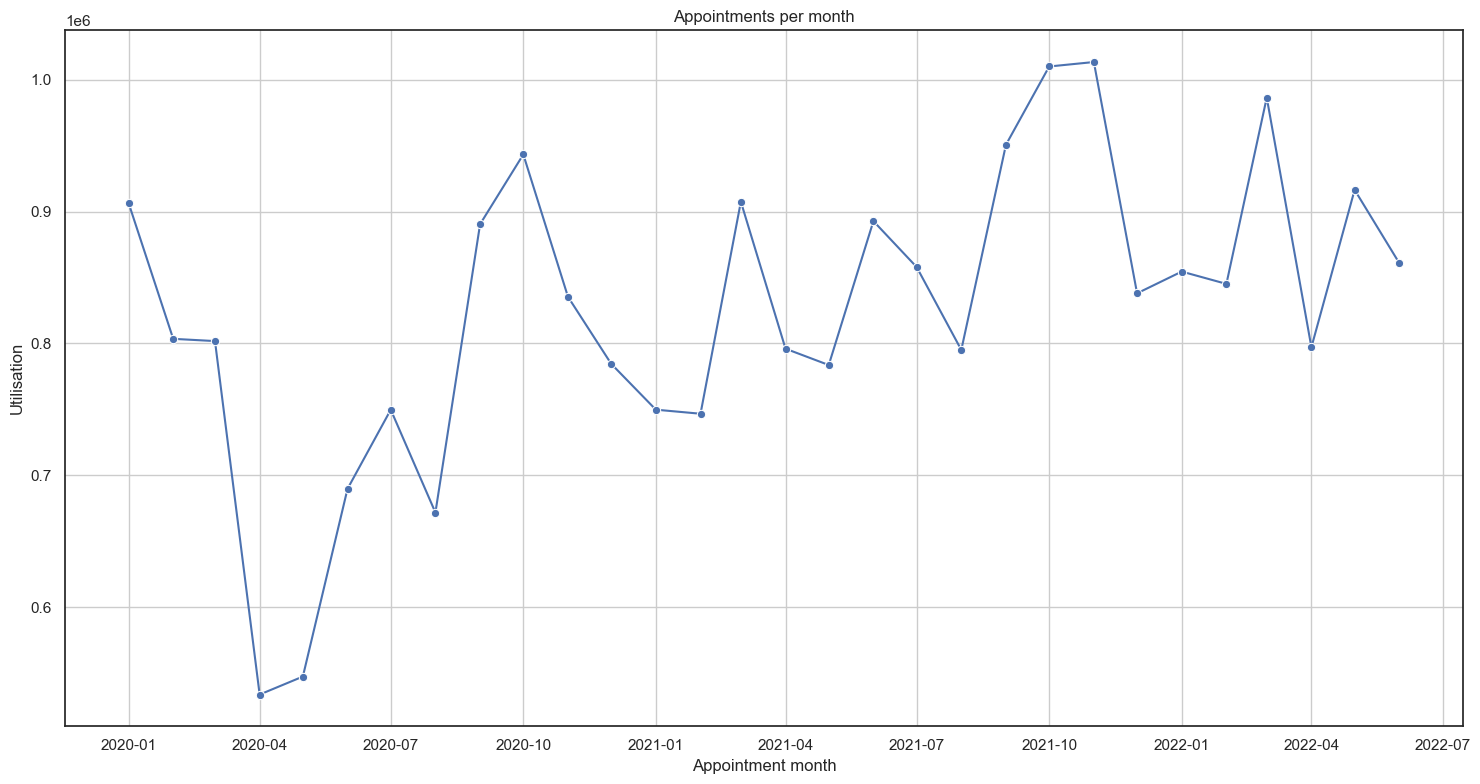

In [76]:
## Create a lineplot indicating the monthly capacity utilisation.
plt.figure(figsize=(15, 8))
sns.lineplot(x='appointment_month', y=ar_df['utilisation'].round(1), data=ar_df, marker='o', palette='Set1')
plt.title('Appointments per month')
plt.xlabel('Appointment month')
plt.ylabel('Utilisation')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Interpretation: 

The data output shows the monthly sum of appointments and the calculated utilisation, which represents the average appointments per day. The utilisation figures range from approximately 533,596 to 1,013,502, indicating the variation in appointment demand across different months. It appears that the NHS's planning guideline of 1,200,000 appointments per day aligns with or exceeds the observed utilisation in certain months, suggesting that the healthcare system is operating at or near its planned capacity.

In [77]:
# Convert the appointment_month to string data type for ease of visualisation.
ar_agg['appointment_month'] = ar['appointment_month'].astype("string")

# View the data types
print(ar_agg.dtypes)

appointment_month                    string
hcp_type                             object
appointment_status                   object
appointment_mode                     object
time_between_book_and_appointment    object
sum_of_appointments                   int64
dtype: object


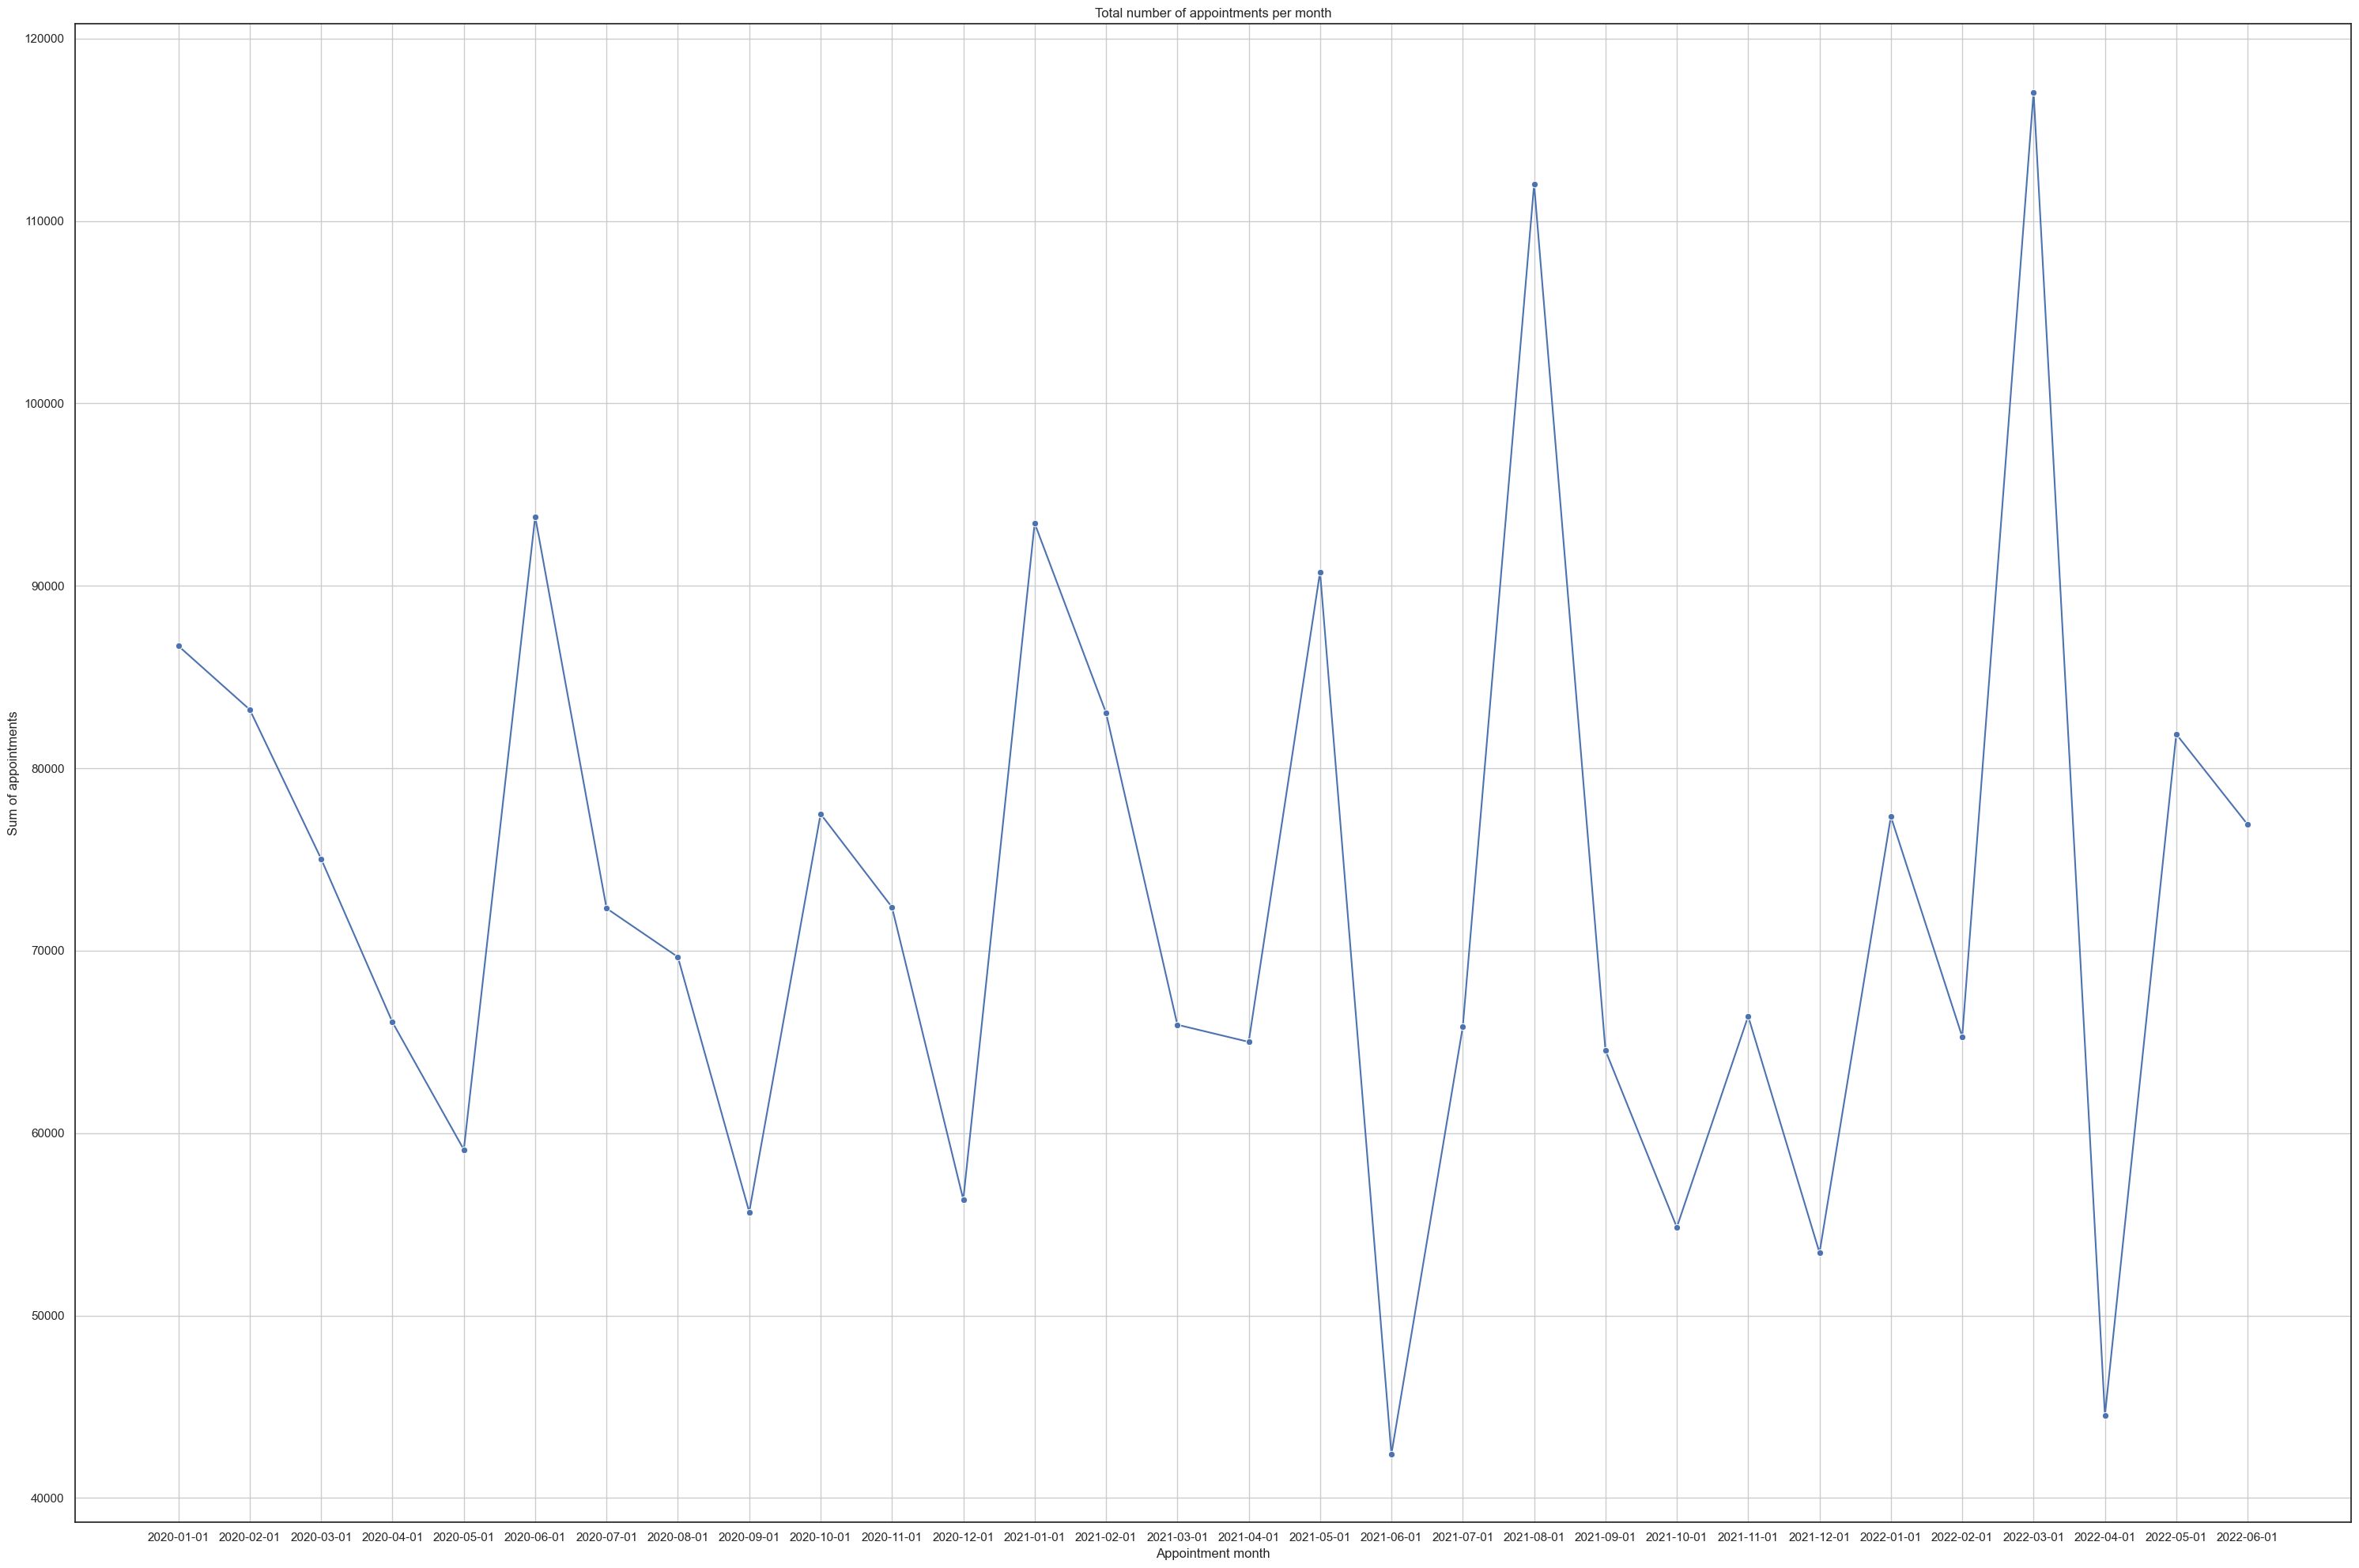

In [78]:
# Create a lineplot indicating the number of monthly visits. 
plt.figure(figsize=(30, 20))
sns.lineplot(x='appointment_month', y='sum_of_appointments', data=ar_agg, marker='o', ci=None)
plt.title('Total number of appointments per month')
plt.xlabel('Appointment month')
plt.ylabel('Sum of appointments')
plt.grid(True)
plt.tight_layout()
plt.show() 

**Question 2:** How do the healthcare professional types differ over time?

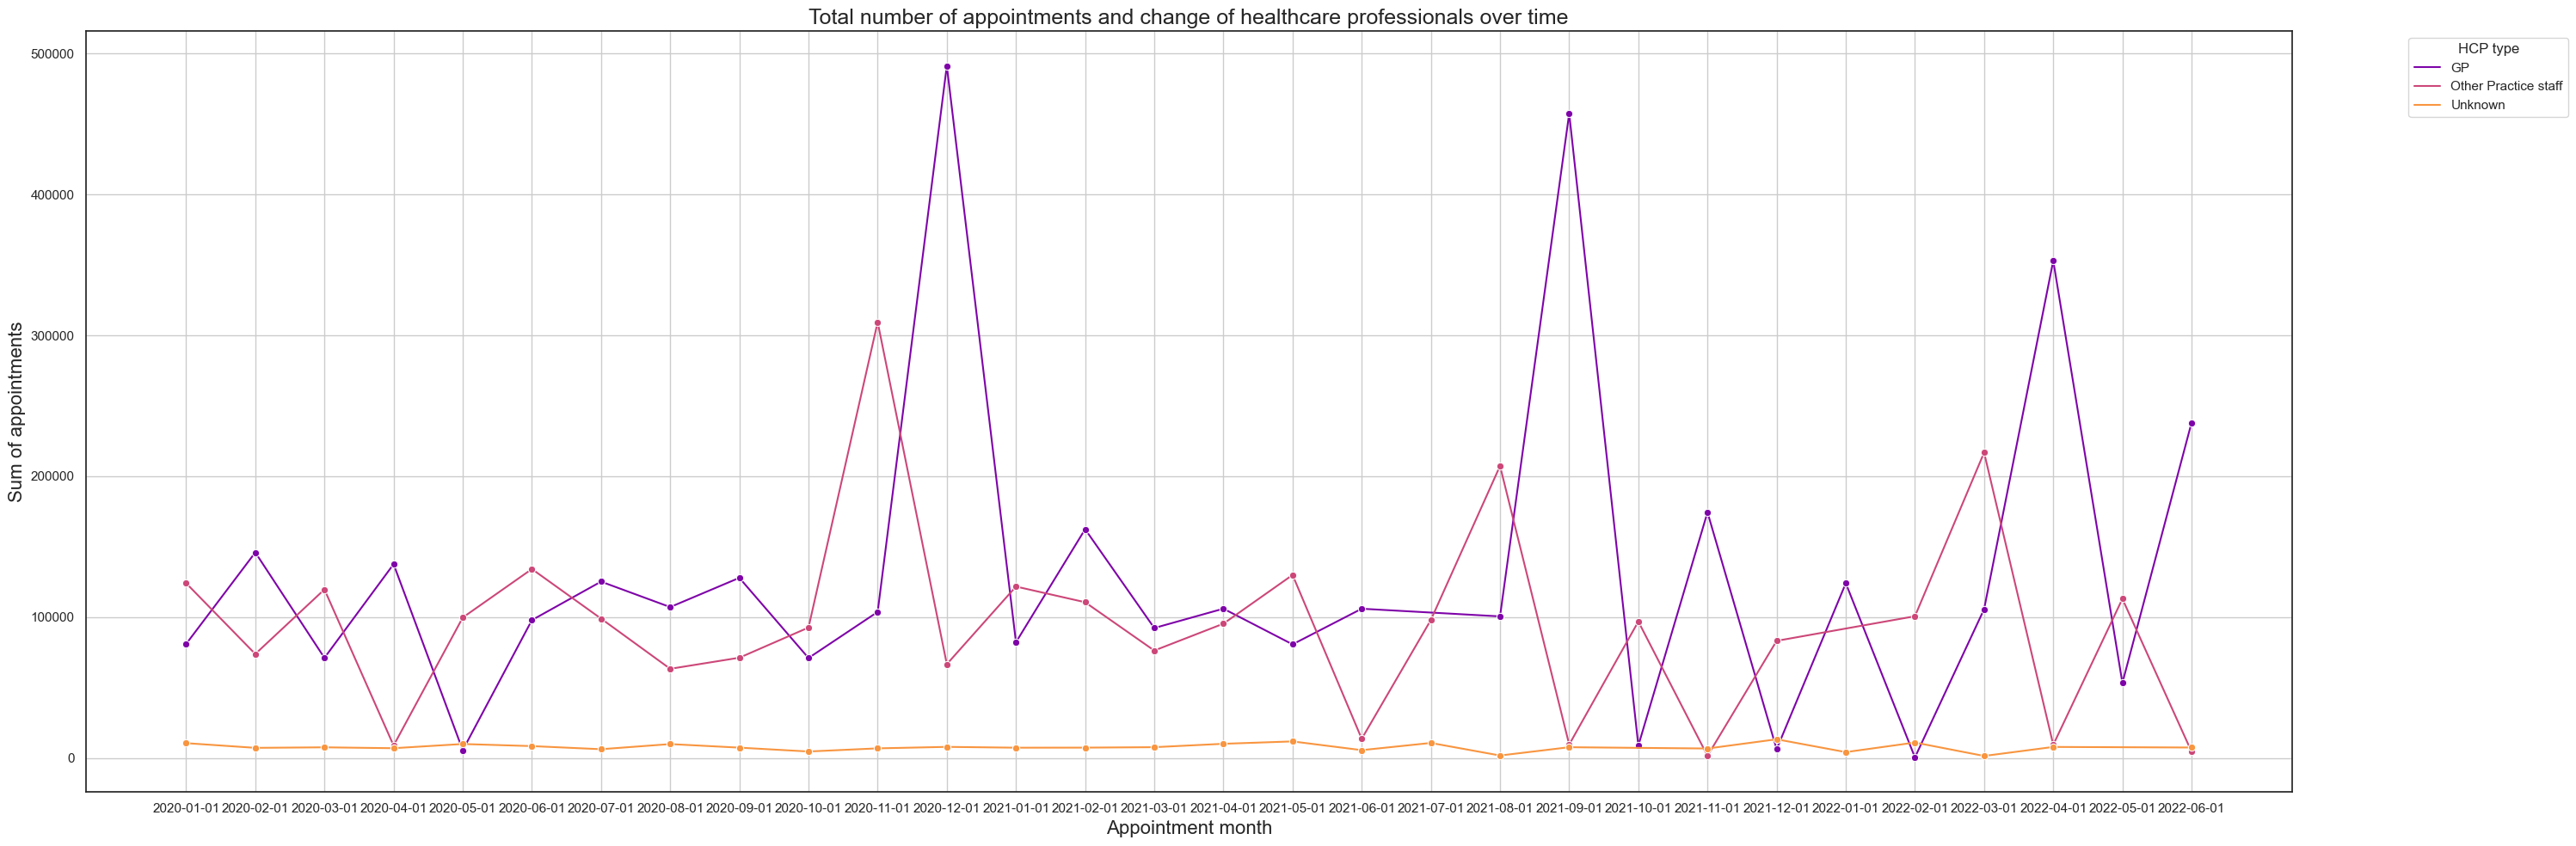

In [79]:
# Create a lineplot to answer the question.
plt.figure(figsize=(30, 10))
sns.lineplot(x='appointment_month', y='sum_of_appointments', hue='hcp_type', data=ar_agg, marker='o', ci=None, palette='plasma')
plt.title('Total number of appointments and change of healthcare professionals over time', fontsize=18 )
plt.xlabel('Appointment month', fontsize=16 )
plt.ylabel('Sum of appointments', fontsize=16 )
plt.grid(True)
plt.legend(title='HCP type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show() 

#### Interpretation:

- Among the different healthcare professionals, GP's were generally more present for appointments from January 2020 to June 2022. 
- GP peaks are seen in December 2020, September 2021 and April 2022.
- Other Practice staff were the second most attended professional for appointments over time, with peaks seen November 2020, August 2021 and March 2022.
- Between GP's and Other Practice staff appointments oscilate from month to month, with spikes in the months mentioned in the above bullet points.

**Question 3:** Are there significant changes in whether or not visits are attended?

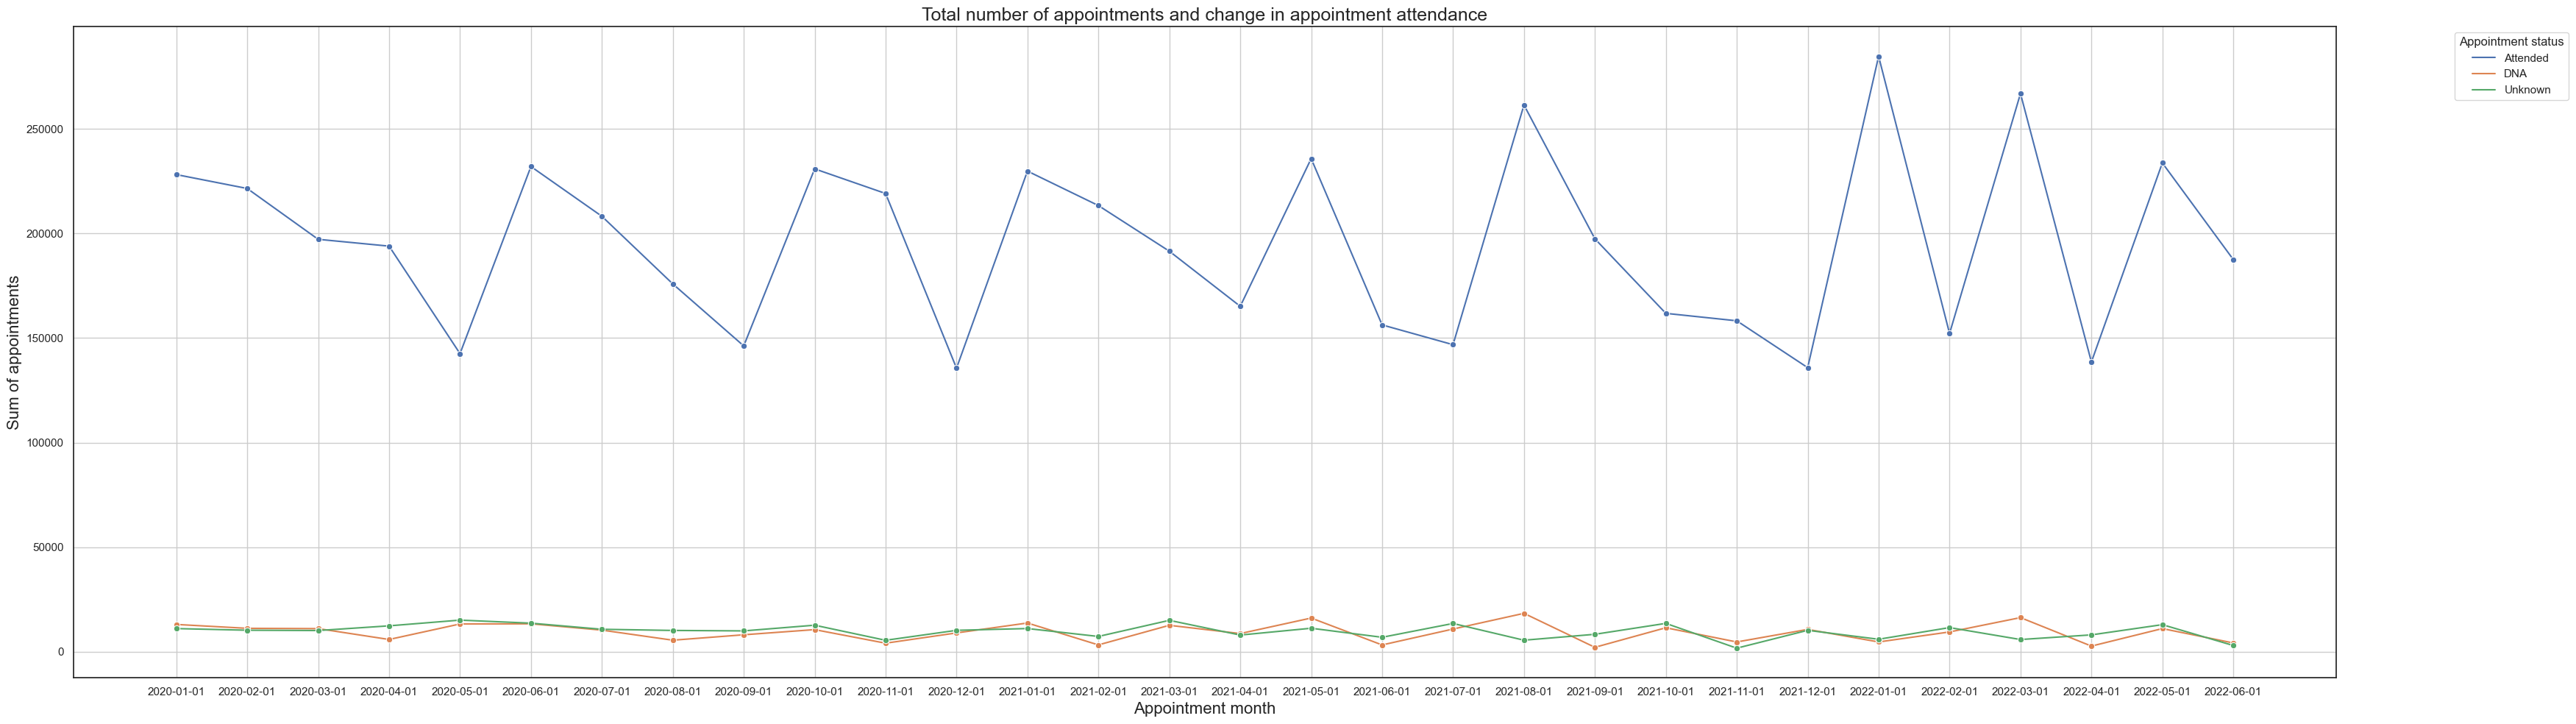

In [80]:
# Create a lineplot to answer the question.
plt.figure(figsize=(35, 10))
sns.lineplot(x='appointment_month', y='sum_of_appointments', hue='appointment_status', data=ar_agg, marker='o', ci=None)
plt.title('Total number of appointments and change in appointment attendance', fontsize=18)
plt.xlabel('Appointment month', fontsize=16)
plt.ylabel('Sum of appointments', fontsize=16)
plt.grid(True)
plt.legend(title='Appointment status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show() 

#### Interpretation: 

- Overall majority of appointments were attended and a significantly lower proportion of appointments were unattended or attendance was not known. 
- Attended appointments exhibited significant fluctuations, characterized by sharp peaks and rapid declines across months. The highest attendance occurred in January 2022, indicating notable variations in healthcare service utilisation during different time periods.

**Question 4:** Are there changes in terms of appointment type and the busiest months?

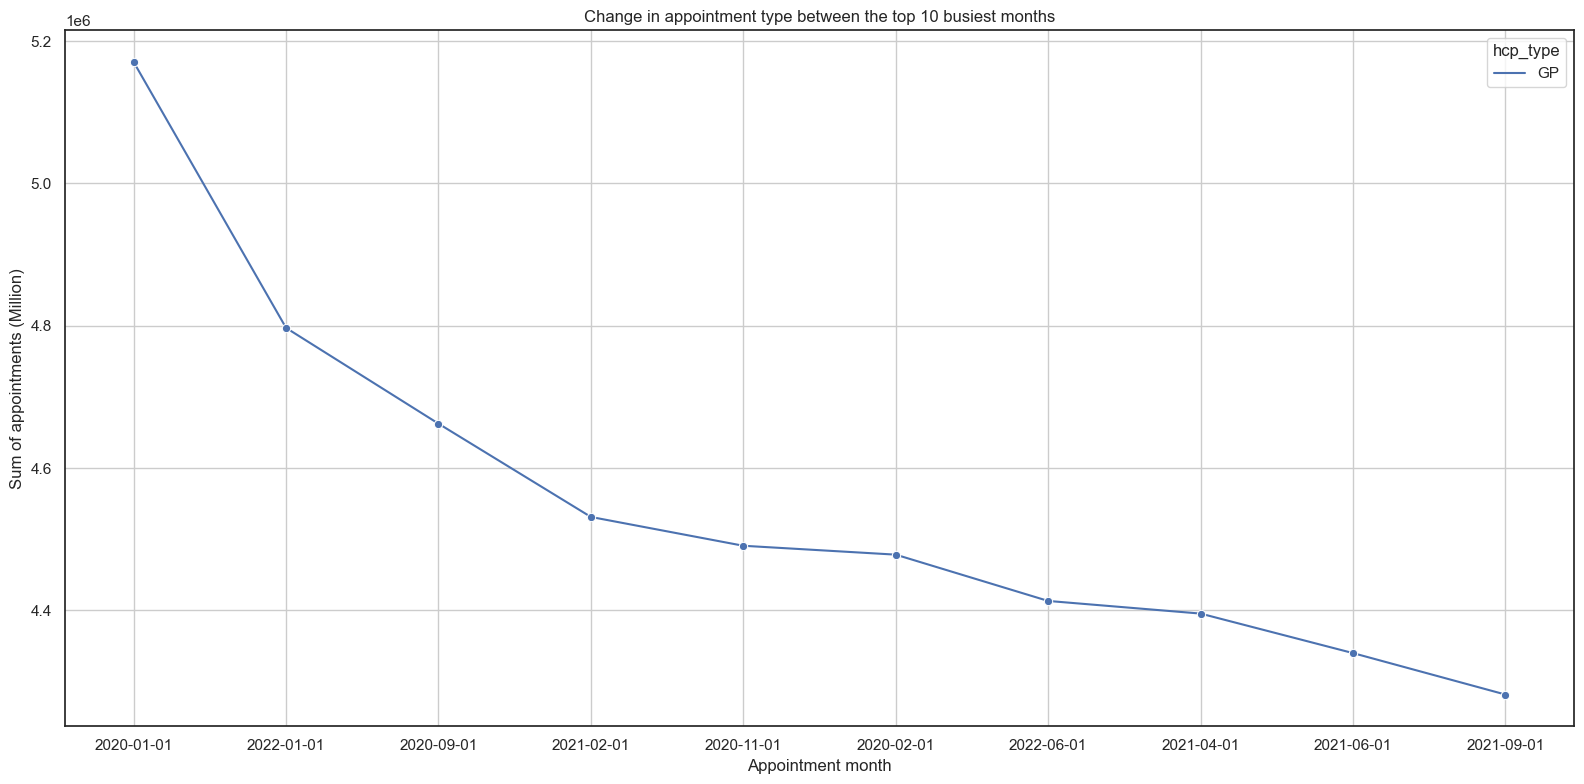

In [81]:
# Top 10 busiest months using the ar_gg DataFrame 
top_10_appointments = ar_agg.sort_values(by='sum_of_appointments', ascending=False).head(10)

# Adjust figure size.
plt.figure(figsize=(16, 8))

# Use top_10_appointments in the lineplot
sns.lineplot(x='appointment_month', y='sum_of_appointments', hue='hcp_type', data=top_10_appointments, marker='o',ci=None,)
plt.title('Change in appointment type between the top 10 busiest months')
plt.xlabel('Appointment month')
plt.ylabel('Sum of appointments (Million)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Interpretation:

Among the top 10 busiest months, the GP was the most attended appointment type, peaking in January 2020 and slowly declining to Sepetember 2021. Printing the whole top_10_appointments DataFrame we will also be able to see whether these appointments were attended, the appointment mode and the time between the booking and appointment.

In [82]:
# View the top 10 appointments 
top_10_appointments

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,sum_of_appointments
6,2020-01-01,GP,Attended,Face-to-Face,Same Day,5170695
4717,2022-01-01,GP,Attended,Telephone,Same Day,4796936
1685,2020-09-01,GP,Attended,Telephone,Same Day,4662319
2689,2021-02-01,GP,Attended,Telephone,Same Day,4531182
2020,2020-11-01,GP,Attended,Telephone,Same Day,4490690
338,2020-02-01,GP,Attended,Face-to-Face,Same Day,4478195
5733,2022-06-01,GP,Attended,Telephone,Same Day,4413108
3028,2021-04-01,GP,Attended,Telephone,Same Day,4395346
3366,2021-06-01,GP,Attended,Telephone,Same Day,4339811
4040,2021-09-01,GP,Attended,Telephone,Same Day,4281530


#### Interpretation:

The output shows that among the top 10 busiest months all GP appointments were attended, majority of the the appointments took place over the phone and on the same day as the appointment was made. 

**Question 5:** Are there any trends in time between booking an appointment?

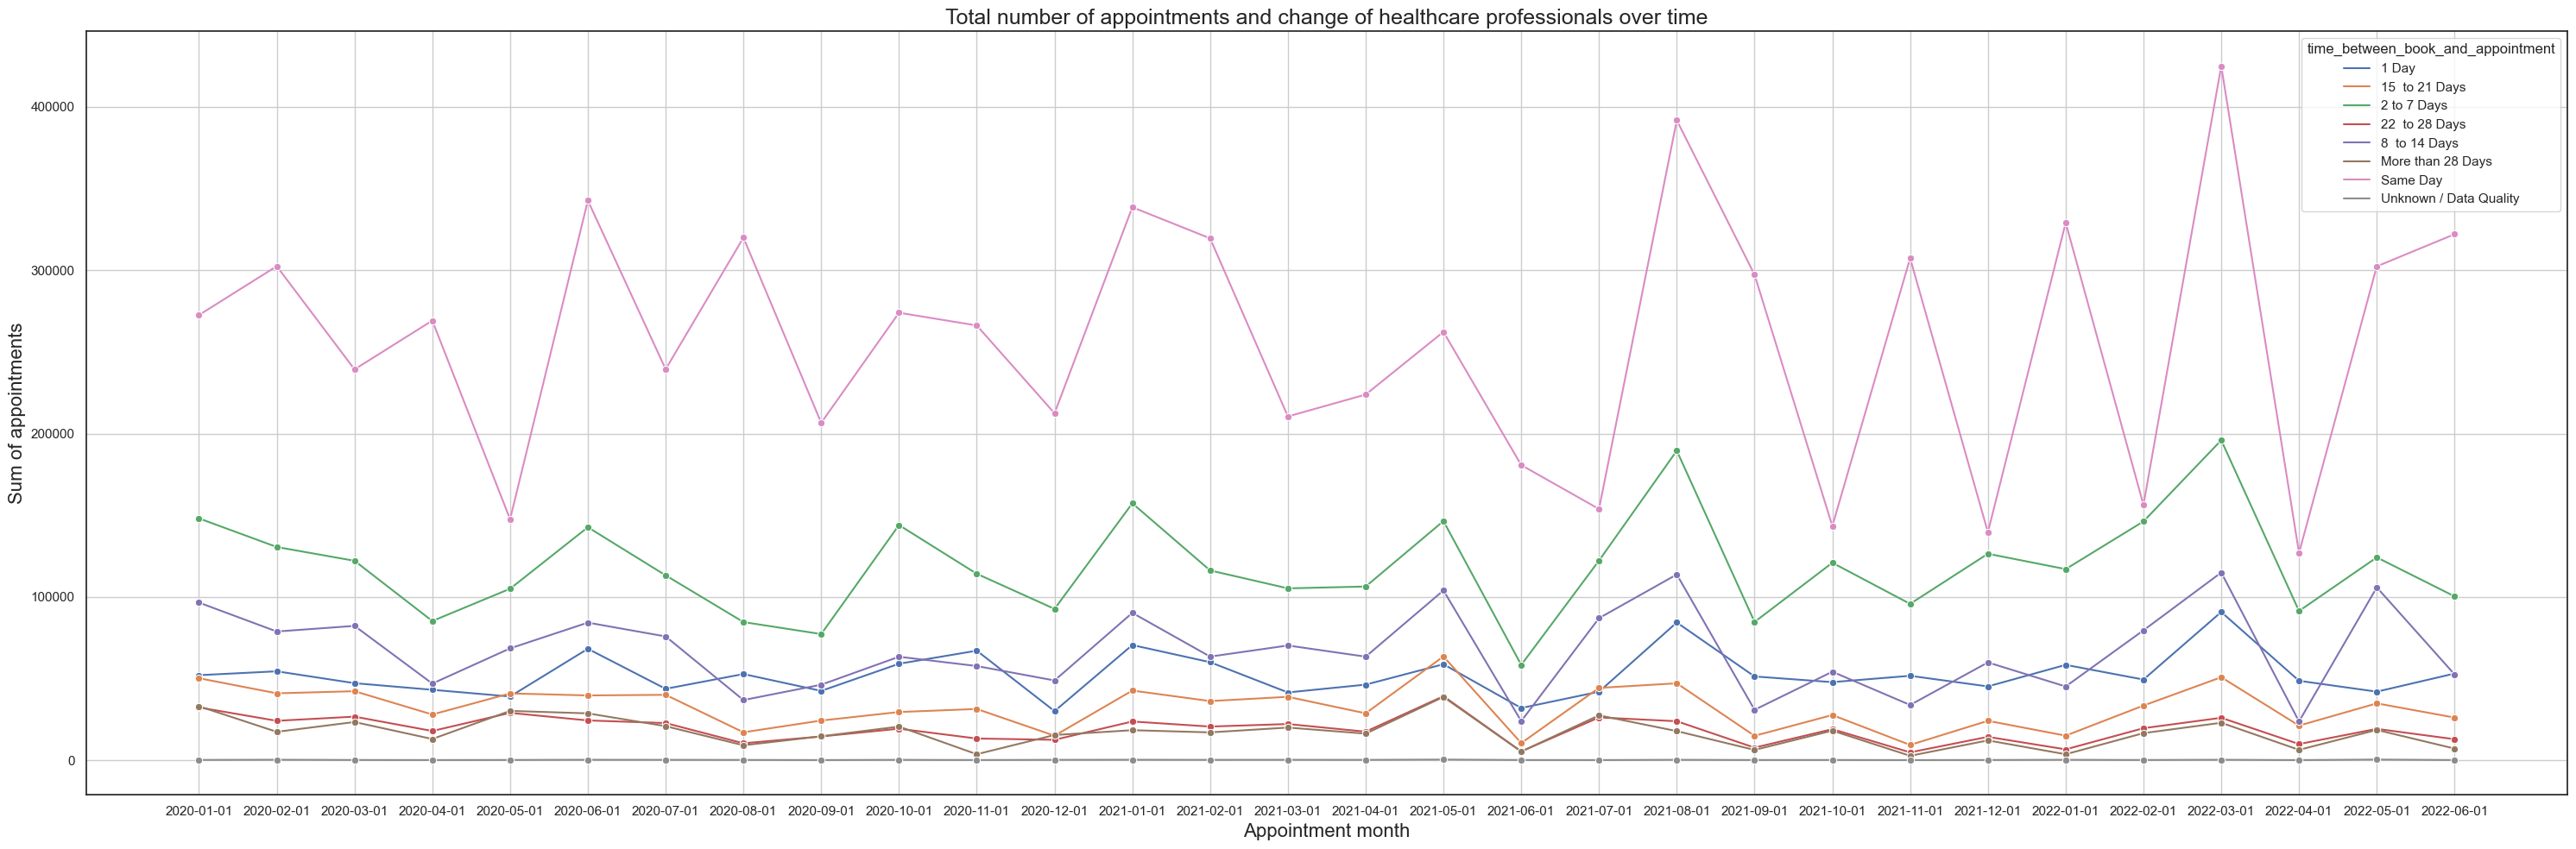

In [83]:
# Create a lineplot to answer the question.
plt.figure(figsize=(30, 10))
sns.lineplot(x='appointment_month', y='sum_of_appointments', hue='time_between_book_and_appointment', data=ar_agg, marker='o', ci=None)
plt.title('Total number of appointments and change of healthcare professionals over time', fontsize= 18)
plt.xlabel('Appointment month', fontsize= 16)
plt.ylabel('Sum of appointments', fontsize= 16)
plt.grid(True)
plt.tight_layout()
plt.show() 

#### Interpretation:

Although oscilating from month to month, the most amount of appointments were bookings made and attended on the same day. It appears that the least amount of appointments were bookings that had a larger time between booking and attendence, for instance more between 22-28 days and more than 28 days.

**Question 6:** How does the spread of service settings compare?

In [84]:
#Create a new DataFrame and group the month of appointment and number of appointments.
monthly_appointments_nc = nc.groupby(nc['appointment_date'].dt.to_period('M'))['count_of_appointments'].sum().reset_index()

# Rename the columns
monthly_appointments_nc.columns = ['appointment_date', 'sum_of_appointments']

# View the ouput
monthly_appointments_nc

,appointment_date,sum_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776
5,2022-01,25635474
6,2022-02,25355260
7,2022-03,29595038
8,2022-04,23913060
9,2022-05,27495508


In [85]:
# Convert 'appointment_month' to datetime if not already
nc_ss['appointment_month'] = pd.to_datetime(nc_ss['appointment_month'])

# Convert 'appointment_month' to date format (exclude time)
nc_ss['appointment_month'] = nc_ss['appointment_month'].dt.date

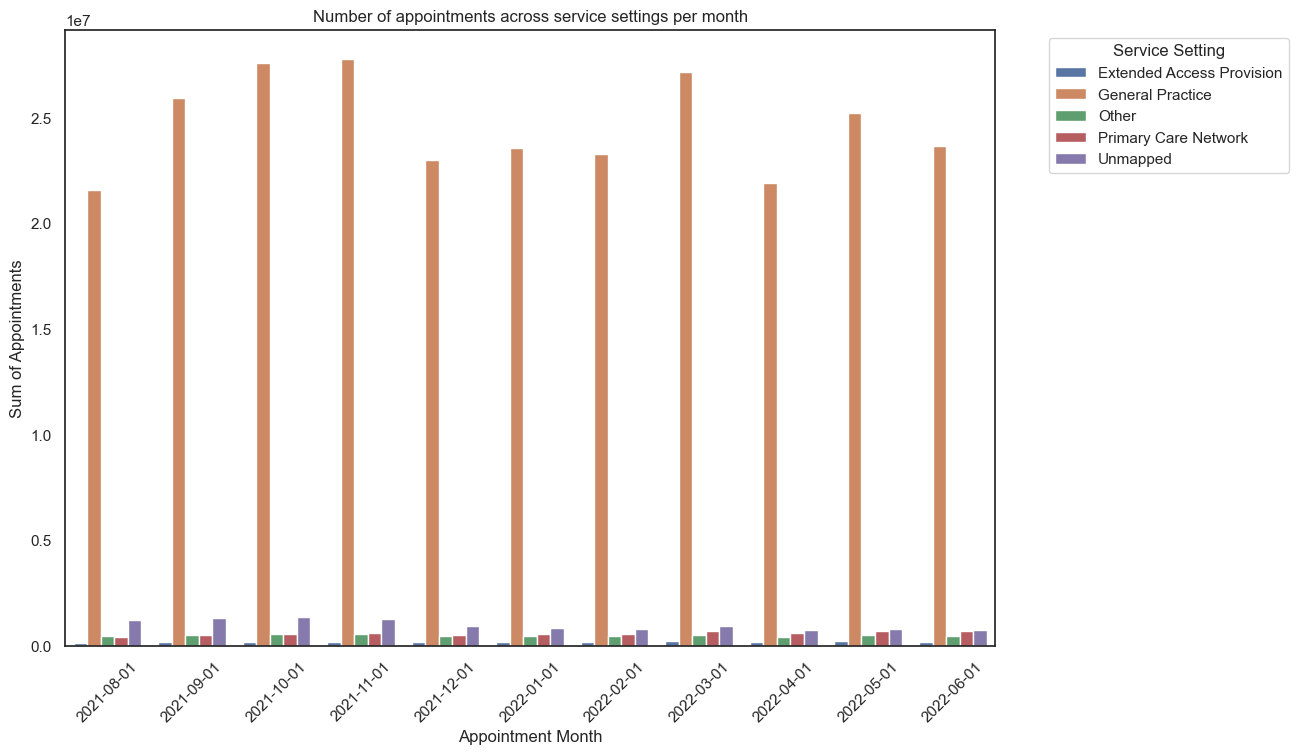

In [86]:
# Create a suitable visualisation in Seaborn based on the new DataFrame to indicate the service settings for the number of appointments.
plt.figure(figsize=(12, 8))
sns.barplot(x='appointment_month', y='sum_of_appointments', hue='service_setting', data=nc_ss, ci=None)
plt.title('Number of appointments across service settings per month')
plt.xlabel('Appointment Month')
plt.ylabel('Sum of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Service Setting')
plt.xticks(rotation=45)

# Move the legend outside the graph
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Interpretation:

Appointments that occurred in a General Practice setting occured more than appointments in any other service setting per month.

In [87]:
# Exclude 'General Practice' from the data
filtered_nc_ss = nc_ss[nc_ss['service_setting'] != 'General Practice']

# View the output
filtered_nc_ss.head()

,appointment_month,service_setting,sum_of_appointments
0,2021-08-01,Extended Access Provision,160927
2,2021-08-01,Other,449101
3,2021-08-01,Primary Care Network,432448
4,2021-08-01,Unmapped,1233843
5,2021-09-01,Extended Access Provision,187906


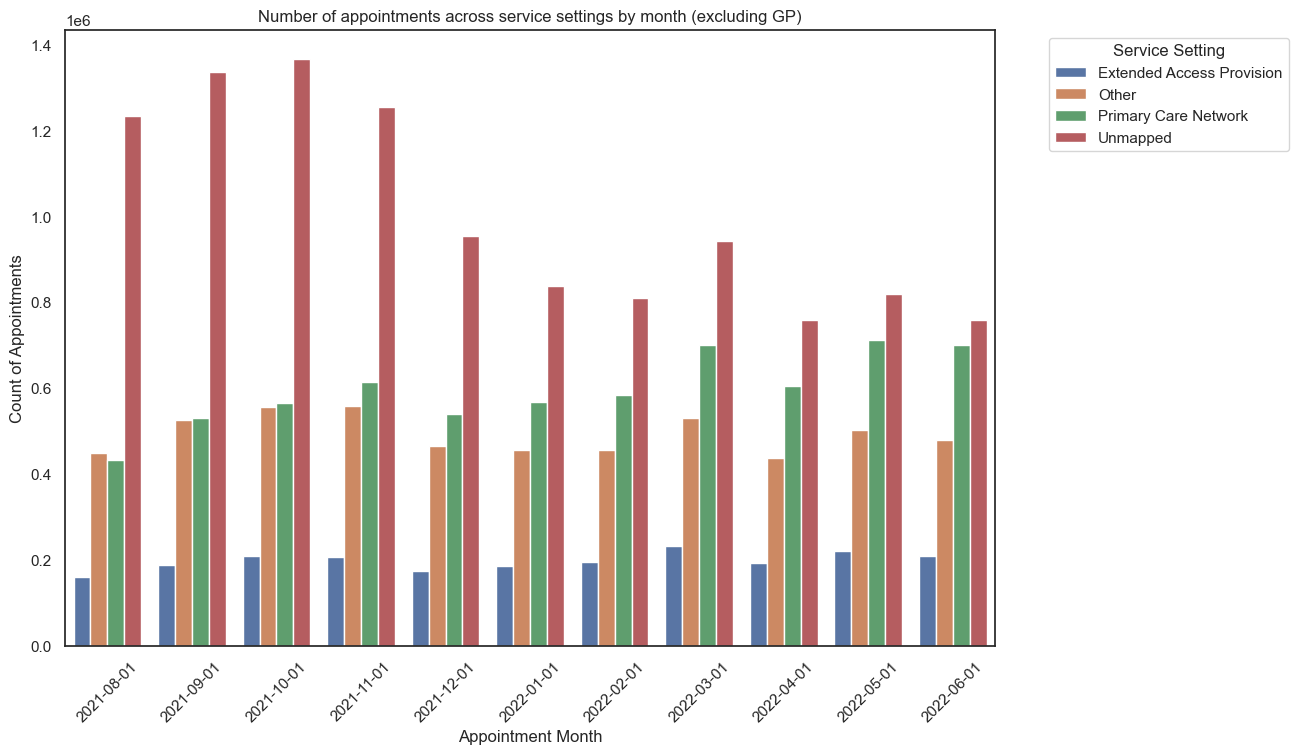

In [88]:
# Create a suitable visualisation in Seaborn based on the new DataFrame to indicate the service settings for the number of appointments.
plt.figure(figsize=(12, 8))
sns.barplot(x='appointment_month', y='sum_of_appointments', hue='service_setting', data=filtered_nc_ss, ci=None)
plt.title('Number of appointments across service settings by month (excluding GP)')
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Service Setting')

# Move the legend outside the graph
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Interpretation:

Exclduing appointments that occurred in a General Practice setting, the above chart shows that the number of appointments per month were next highest in the 'Unmapped' service setting category.

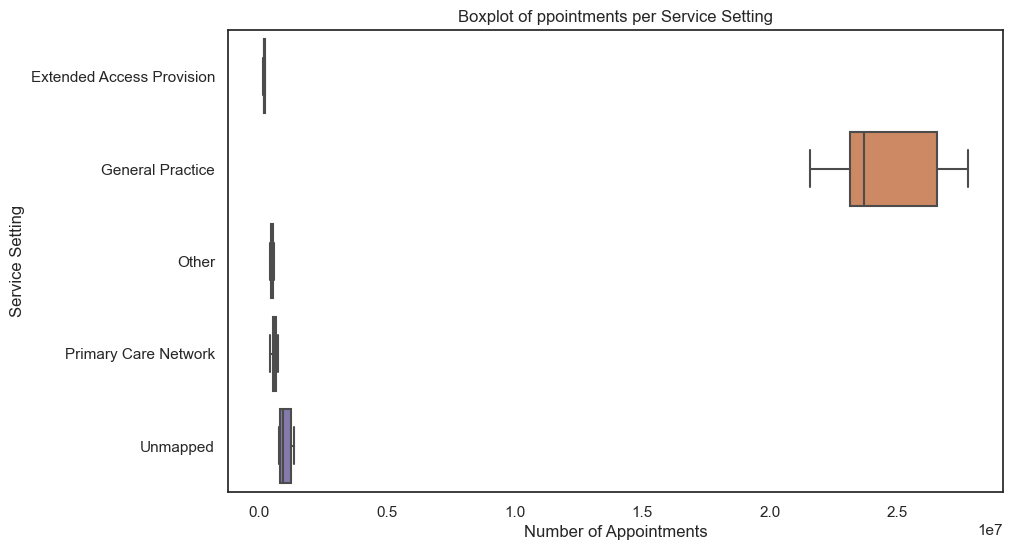

In [89]:
# Create a boxplot to investigate the spread of service settings.
plt.figure(figsize=(10, 6))
sns.boxplot(x='sum_of_appointments', y='service_setting', data=nc_ss)
plt.title('Boxplot of ppointments per Service Setting')
plt.xlabel('Number of Appointments')
plt.ylabel('Service Setting')
plt.show()

In [90]:
# Group by service_setting and compute summary statistics
summary_stats = nc_ss.groupby('service_setting')['sum_of_appointments'].describe()

# Additional statistics
summary_stats['median'] = nc_ss.groupby('service_setting')['sum_of_appointments'].median()
summary_stats['iqr'] = summary_stats['75%'] - summary_stats['25%']

# Print summary statistics
summary_stats

,count,mean,std,min,25%,50%,75%,max,median,iqr
service_setting,,,,,,,,,,
Extended Access Provision,11.0,1.978915e+05,2.064667e+04,160927.0,187140.5,196627.0,209595.5,231905.0,196627.0,22455.0
General Practice,11.0,2.461924e+07,2.244996e+06,21575852.0,23157376.0,23680374.0,26564094.5,27767889.0,23680374.0,3406718.5
Other,11.0,4.927342e+05,4.437684e+04,437402.0,456796.5,478813.0,528925.5,558784.0,478813.0,72129.0
Primary Care Network,11.0,5.961260e+05,8.497987e+04,432448.0,552230.0,585300.0,657461.5,712280.0,585300.0,105231.5
Unmapped,11.0,1.007346e+06,2.412129e+05,758640.0,816008.0,942912.0,1245169.5,1366656.0,942912.0,429161.5


#### Interpretation:

I've opted to present the data distribution in a table format. This decision stems from the disparity in the range of values among various service settings. The substantial difference in data ranges tends to compress the boxplots for smaller plots, prompting the use of a table to better showcase the spread of data.

##### Extended Access Provision:
Mean: 197,891, Std: 20,647, Min: 160,927
Median: 196,627, IQR: 22,455

##### General Practice:
Mean: 24,619,240, Std: 2,244,996, Min: 21,575,852
Median: 23,680,374, IQR: 3,406,718.5

##### Other:
Mean: 492,734.2, Std: 44,376.8, Min: 437,402
Median: 478,813, IQR: 72,129

##### Primary Care Network:
Mean: 596,126, Std: 84,979.87, Min: 432,448
Median: 585,300, IQR: 105,231.5

##### Unmapped:
Mean: 1,007,346, Std: 241,212.9, Min: 758,640
Median: 942,912, IQR: 429,161.5

- These insights provide a nuanced understanding of appointment distribution and variability across different service settings.

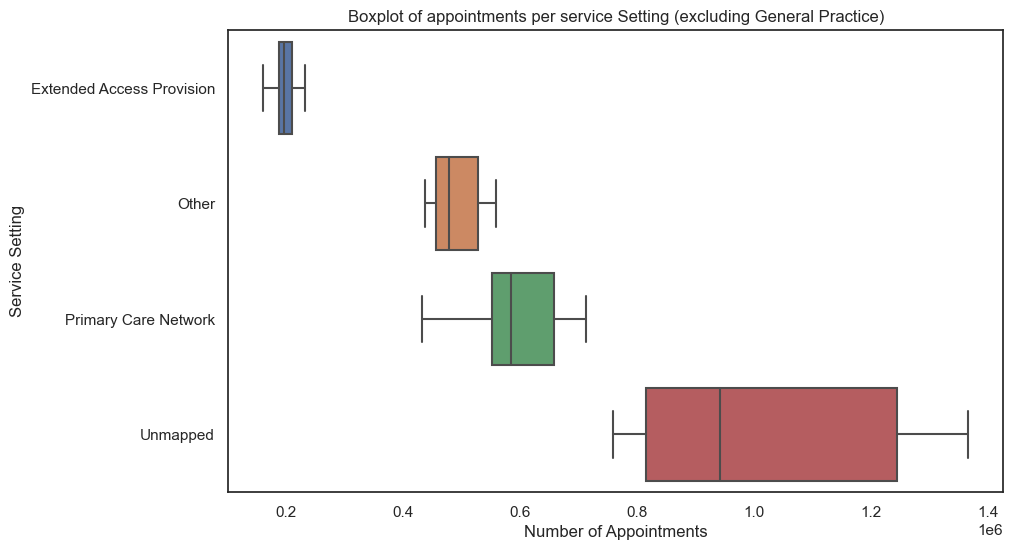

In [91]:
# Create a boxplot to investigate the service settings without GP.
plt.figure(figsize=(10, 6))
sns.boxplot(x='sum_of_appointments', y='service_setting', data=filtered_nc_ss)
plt.title('Boxplot of appointments per service Setting (excluding General Practice)')
plt.xlabel('Number of Appointments')
plt.ylabel('Service Setting')
plt.show()

In [92]:
# Group by service_setting and compute summary statistics
summary_stats_nc_ss = filtered_nc_ss.groupby('service_setting')['sum_of_appointments'].describe()

# Additional statistics
summary_stats_nc_ss ['median'] = nc_ss.groupby('service_setting')['sum_of_appointments'].median()
summary_stats_nc_ss ['iqr'] = summary_stats_nc_ss ['75%'] - summary_stats_nc_ss ['25%']

# Print summary statistics
summary_stats_nc_ss 

,count,mean,std,min,25%,50%,75%,max,median,iqr
service_setting,,,,,,,,,,
Extended Access Provision,11.0,1.978915e+05,20646.670203,160927.0,187140.5,196627.0,209595.5,231905.0,196627.0,22455.0
Other,11.0,4.927342e+05,44376.840146,437402.0,456796.5,478813.0,528925.5,558784.0,478813.0,72129.0
Primary Care Network,11.0,5.961260e+05,84979.873549,432448.0,552230.0,585300.0,657461.5,712280.0,585300.0,105231.5
Unmapped,11.0,1.007346e+06,241212.932738,758640.0,816008.0,942912.0,1245169.5,1366656.0,942912.0,429161.5


#### Interpretation:

##### Extended Access Provision:
Mean: 197,891, Std: 20,647
Min: 160,927, Median: 196,627
IQR: 22,455

##### Other:
Mean: 492,734.2, Std: 44,376.8
Min: 437,402, Median: 478,813
IQR: 72,129

##### Primary Care Network:
Mean: 596,126, Std: 84,979.87
Min: 432,448, Median: 585,300
IQR: 105,231.5

##### Unmapped:
Mean: 1,007,346, Std: 241,212.9
Min: 758,640, Median: 942,912
IQR: 429,161.5


The above sumamarises key statistics for each service setting (excluding General practice) to understand the distribution and central tendency of appointment numbers.
